In [31]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
from lab1.runners import *
from common.benchmark import BenchmarkResult
from numpy import cos
from numpy import exp
from numpy import pi

In [2]:
%load_ext autoreload
%autoreload 2

### Сравнение методов

Самая простая функция

In [3]:
def f(x: float, y: float) -> float:
    return (x - 1) ** 2 + y ** 2


GLOBAL_A = Coef.GEOMETRIC_PROGRESSION(0.1, 0.999)
GLOBAL_EXIT_CONDITION = ExitCondition.NORM(Metric.EUCLID, 0.0001)

In [4]:
TARGET = Vector(1, 0)
PROBLEM = Oracle(f, TARGET)
b = BenchmarkResult.compare(RunnerMeta.runners, dict(
    o=PROBLEM,
    start=Vector(2, 1),
    a=GLOBAL_A,
    exit_condition=GLOBAL_EXIT_CONDITION
))

--running CoordinateDescendRunner
--running GradientDescendRunner
--running CoordinateGradientRunner
--running NelderMeadRunner
--running CoordinateDescendImprovedRunner


In [5]:
b.top("accuracy", "time", "queries")

sorted by accuracy
| name                            |   accuracy |   queries |       time |
|---------------------------------+------------+-----------+------------|
| CoordinateDescendImprovedRunner | 0.00000000 |       175 | 0.00054230 |
| CoordinateGradientRunner        | 0.00000006 |       158 | 0.00052780 |
| NelderMeadRunner                | 0.00446726 |        73 | 0.00200220 |
| CoordinateDescendRunner         | 0.01508171 |       149 | 0.00143400 |
| GradientDescendRunner           | 0.06646943 |       185 | 0.00046050 |

sorted by time
| name                            |   accuracy |   queries |       time |
|---------------------------------+------------+-----------+------------|
| GradientDescendRunner           | 0.06646943 |       185 | 0.00046050 |
| CoordinateGradientRunner        | 0.00000006 |       158 | 0.00052780 |
| CoordinateDescendImprovedRunner | 0.00000000 |       175 | 0.00054230 |
| CoordinateDescendRunner         | 0.01508171 |       149 | 0.00143400 |
| N

### Плохо обусловленные функции

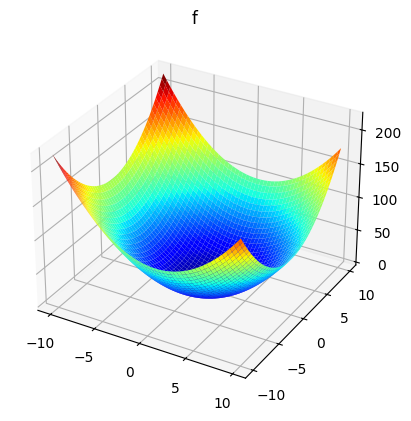

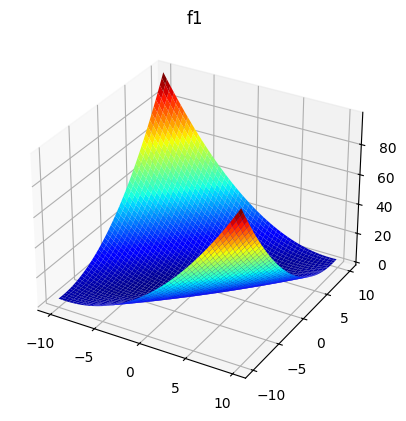

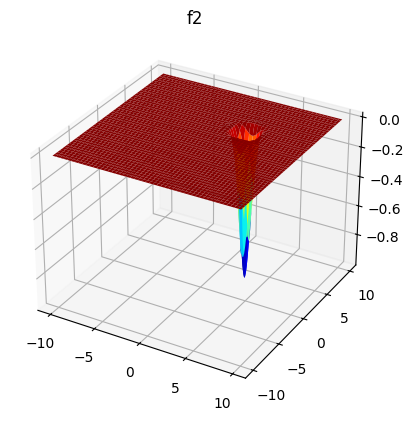

In [6]:
from numpy import cos
from numpy import exp
from numpy import pi


def f1(x, y):
    return 0.26 * (x ** 2 + y ** 2) - 0.48 * x * y


def f2(x, y):
    return -cos(x) * cos(y) * exp(-((x - pi) ** 2 + (y - pi) ** 2))


plot(f)
plot(f1)
plot(f2)

In [7]:
fs = [f, f1, f2]

_params_base = dict(
    start=Vector(*([3] * 2)),
    a=GLOBAL_A,
    exit_condition=GLOBAL_EXIT_CONDITION
)

params = [
    dict(**_params_base, o=Oracle(f, Vector(1, 0))),
    dict(**_params_base, o=Oracle(f1, Vector(0, 0))),
    dict(**_params_base, o=Oracle(f2, Vector(pi, pi))),
]
# (GradientDescendRunner, CoordinateGradientRunner)
bs = BenchmarkResult.series(RunnerMeta.runners, params)

running experiment 1
--running CoordinateDescendRunner
--running GradientDescendRunner
--running CoordinateGradientRunner
--running NelderMeadRunner
--running CoordinateDescendImprovedRunner
running experiment 2
--running CoordinateDescendRunner
--running GradientDescendRunner
--running CoordinateGradientRunner
--running NelderMeadRunner
--running CoordinateDescendImprovedRunner
running experiment 3
--running CoordinateDescendRunner
--running GradientDescendRunner
--running CoordinateGradientRunner
--running NelderMeadRunner
--running CoordinateDescendImprovedRunner


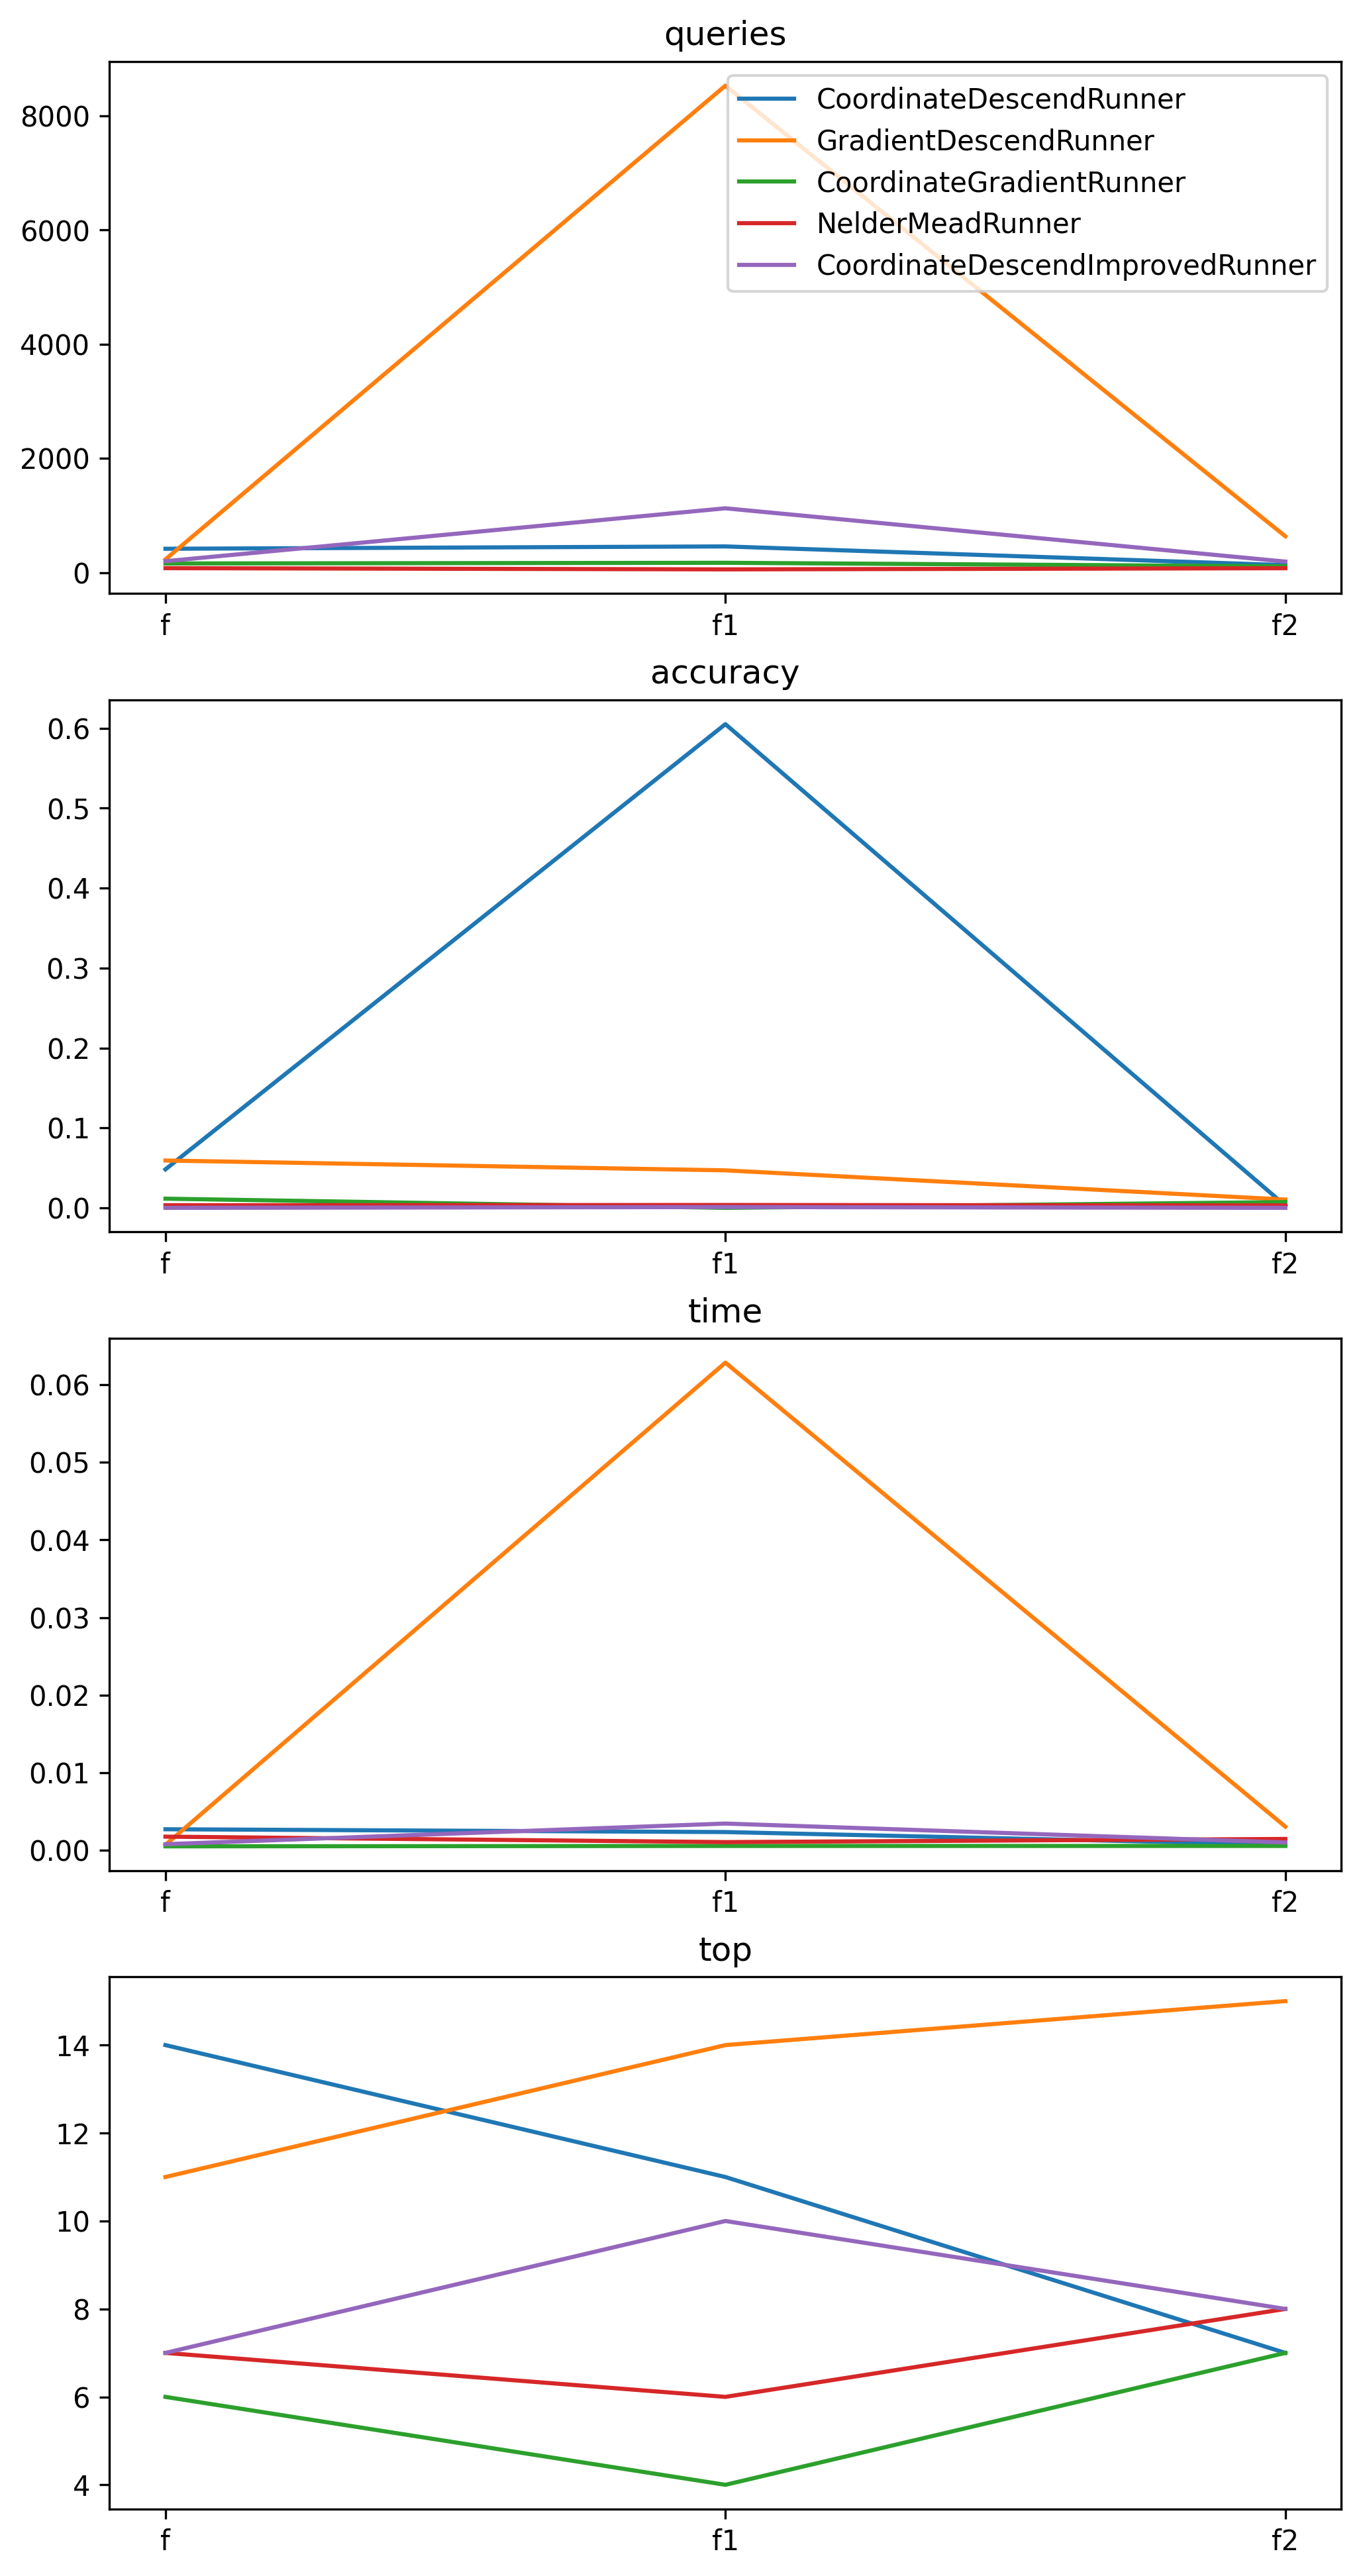

In [8]:
BenchmarkResult.plot_results(bs, ("queries", "accuracy", "time", "top"), names=list(map(lambda el: el.__name__, fs)))

In [9]:
bs[1].top("queries", "accuracy", "time")

sorted by queries
| name                            |   accuracy |   queries |       time |
|---------------------------------+------------+-----------+------------|
| NelderMeadRunner                | 0.00356497 |        55 | 0.00106690 |
| CoordinateGradientRunner        | 0.00000001 |       170 | 0.00057080 |
| CoordinateDescendRunner         | 0.60519398 |       457 | 0.00236120 |
| CoordinateDescendImprovedRunner | 0.00099358 |      1125 | 0.00345610 |
| GradientDescendRunner           | 0.04692171 |      8530 | 0.06283570 |

sorted by accuracy
| name                            |   accuracy |   queries |       time |
|---------------------------------+------------+-----------+------------|
| CoordinateGradientRunner        | 0.00000001 |       170 | 0.00057080 |
| CoordinateDescendImprovedRunner | 0.00099358 |      1125 | 0.00345610 |
| NelderMeadRunner                | 0.00356497 |        55 | 0.00106690 |
| GradientDescendRunner           | 0.04692171 |      8530 | 0.06283570 |


`GradientDescendRunner` показывает себя очень плохо на этих функциях, так как они плохо обусловлены
`CoordinateDescendRunner` с генерируемым шагом тоже показывает себя не очень из-за плохой обусловленности 

### Зависимость от точки старта

In [10]:
point_dists = range(0, 10)

TARGET = Vector(1, 0)
PROBLEM = Oracle(f, TARGET)
params = []

def f(x: float, y: float) -> float:
    return (x - 1) ** 2 + y ** 2


for dist in point_dists:
    params.append(dict(
        o=Oracle(f, TARGET),
        start=Vector(2, 1) + Vector(1, 1) * dist,
        a=GLOBAL_A,
        exit_condition=GLOBAL_EXIT_CONDITION
    ))
bs = BenchmarkResult.series(RunnerMeta.runners, params)


running experiment 1
--running CoordinateDescendRunner
--running GradientDescendRunner
--running CoordinateGradientRunner
--running NelderMeadRunner
--running CoordinateDescendImprovedRunner
running experiment 2
--running CoordinateDescendRunner
--running GradientDescendRunner
--running CoordinateGradientRunner
--running NelderMeadRunner
--running CoordinateDescendImprovedRunner
running experiment 3
--running CoordinateDescendRunner
--running GradientDescendRunner
--running CoordinateGradientRunner
--running NelderMeadRunner
--running CoordinateDescendImprovedRunner
running experiment 4
--running CoordinateDescendRunner
--running GradientDescendRunner
--running CoordinateGradientRunner
--running NelderMeadRunner
--running CoordinateDescendImprovedRunner
running experiment 5
--running CoordinateDescendRunner
--running GradientDescendRunner
--running CoordinateGradientRunner
--running NelderMeadRunner
--running CoordinateDescendImprovedRunner
running experiment 6
--running CoordinateDesc

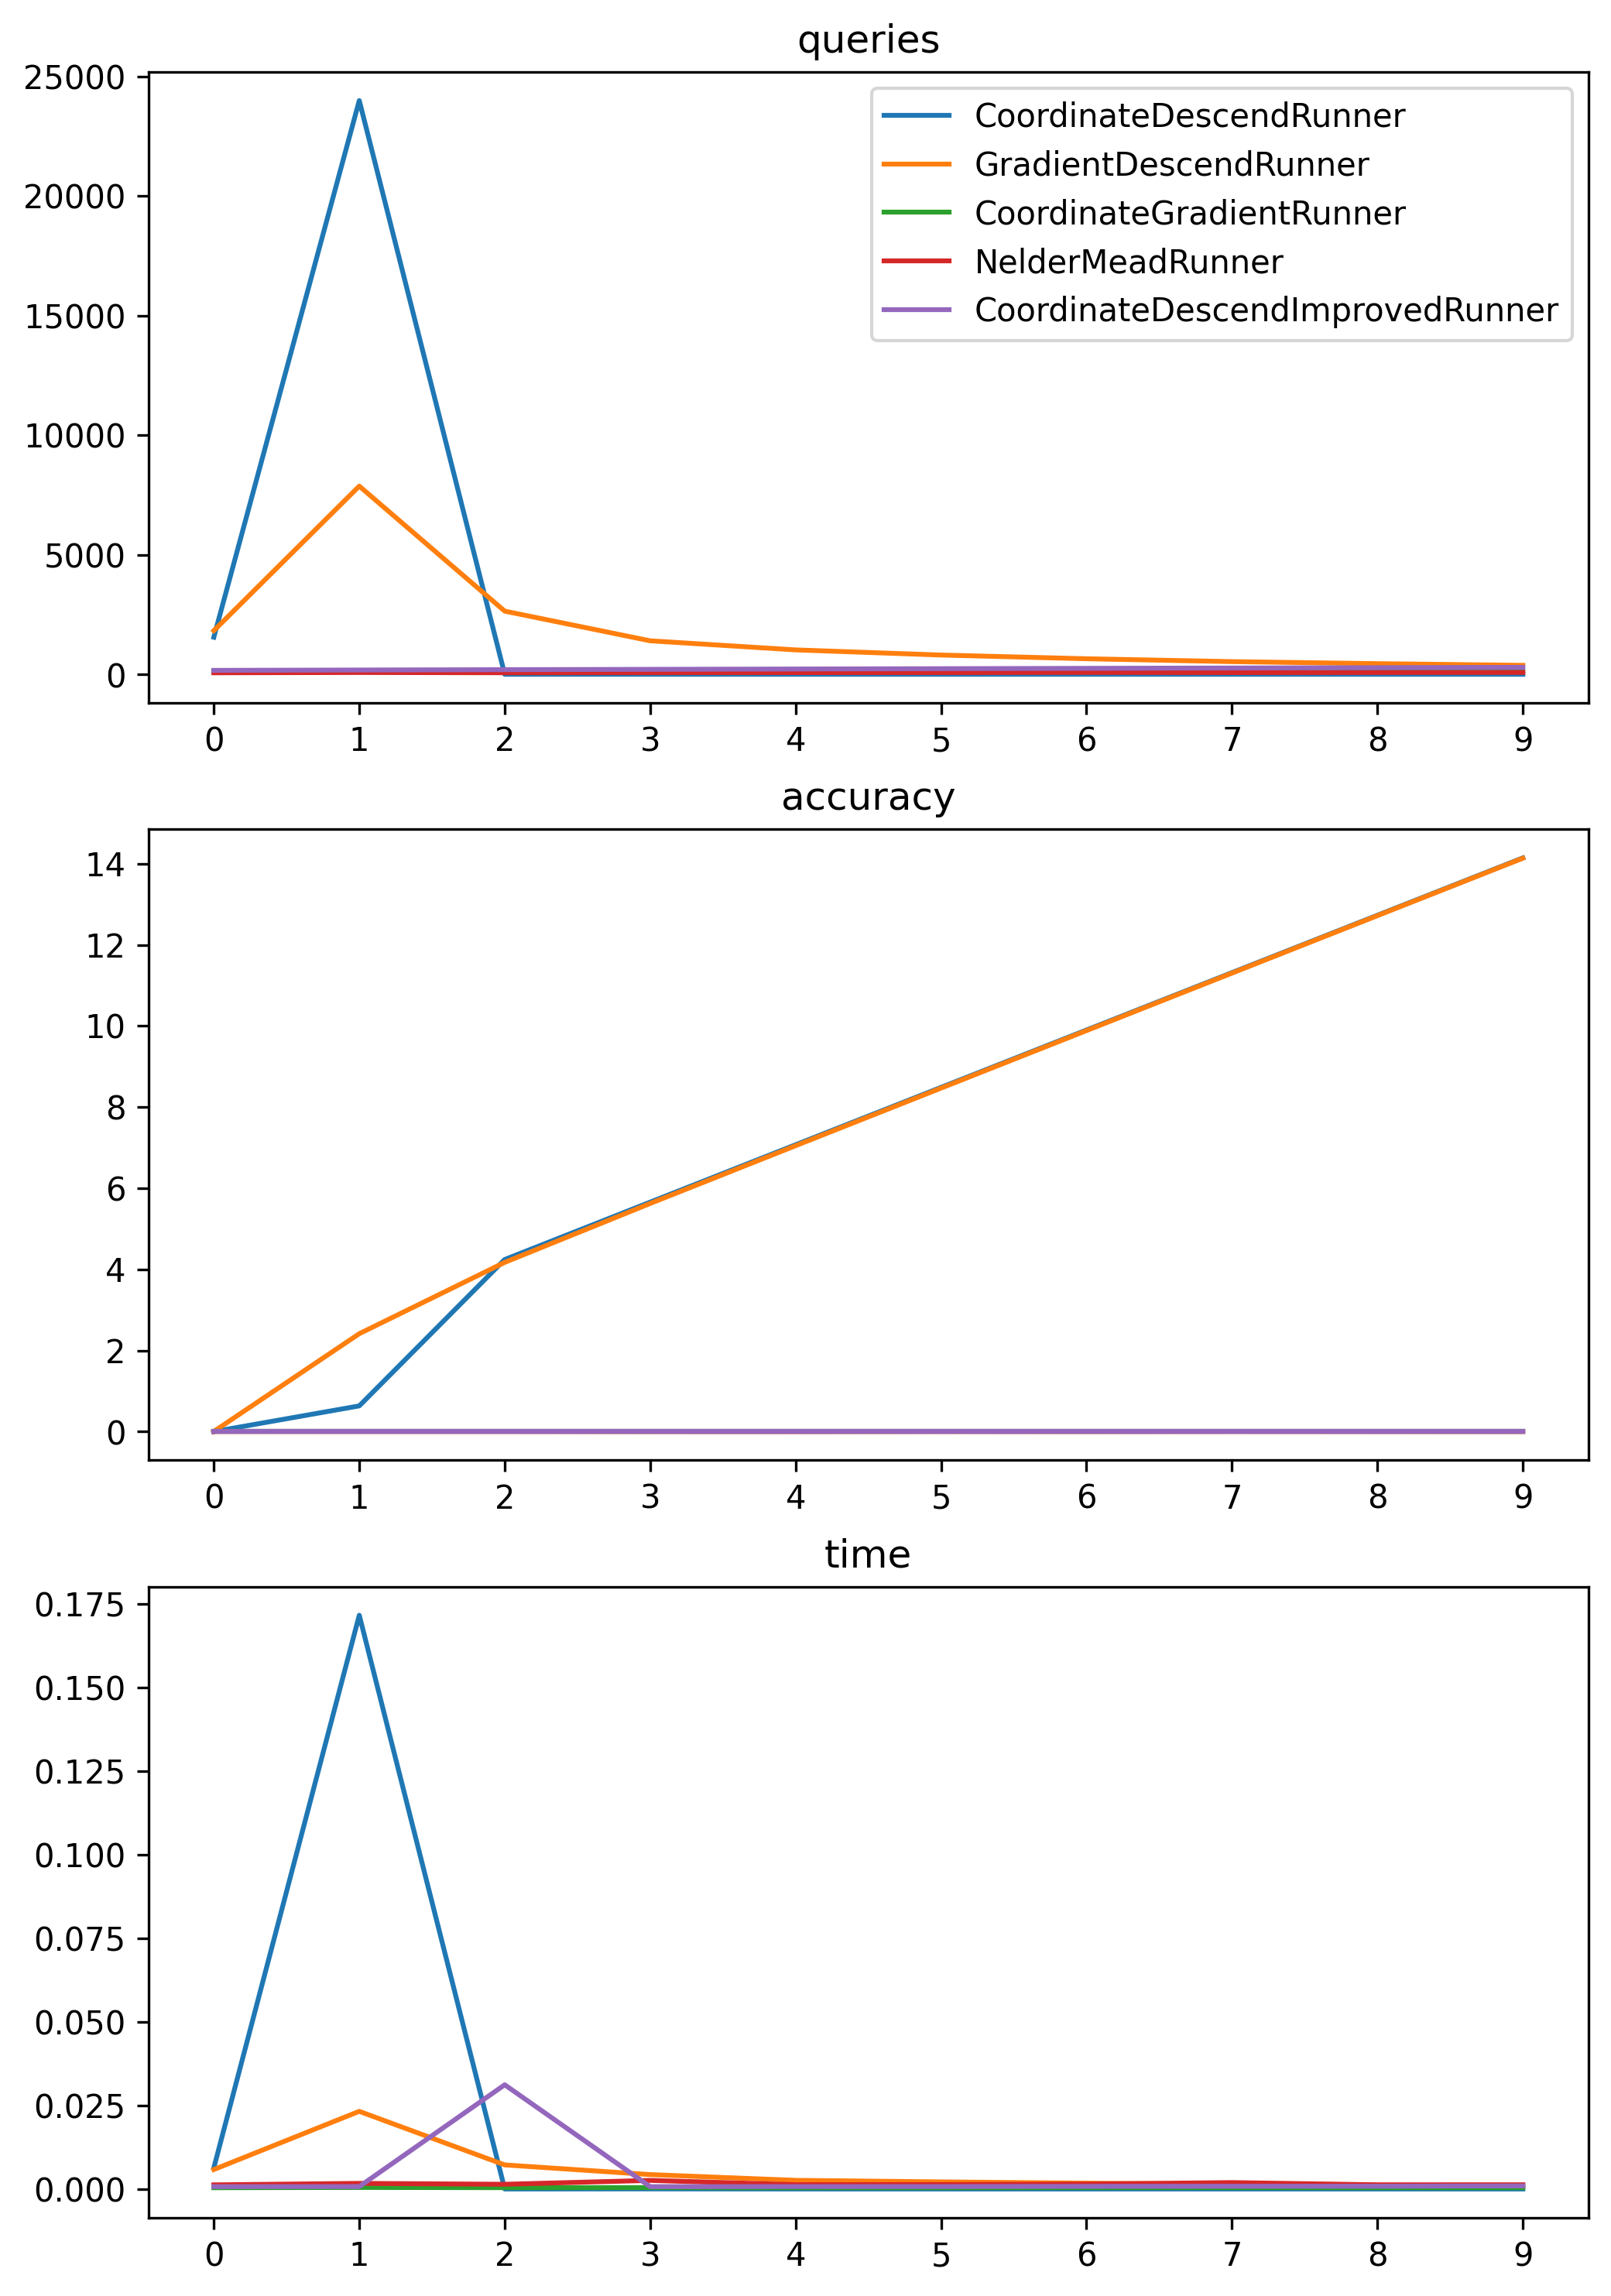

In [11]:
BenchmarkResult.plot_results(bs, ("queries", "accuracy", "time"), names=list(map(str, point_dists)))

При большом расстоянии `GradientDescendRunner` и `CoordinateDescendRunner` не успевают добежать до точки (так как длина шага генерируется геометрической прогрессией)

### N-мерные пространства

In [12]:
ns = range(2, 11)

params = []
for n in ns:
    def f(*args):
        return sum(map(lambda a: a ** 2, args))


    TARGET = Vector(*([0] * n))
    params.append(dict(
        o=Oracle(f, TARGET),
        start=Vector(*([1] * n)),
        a=GLOBAL_A,
        exit_condition=GLOBAL_EXIT_CONDITION
    ))
# (GradientDescendRunner, CoordinateGradientRunner)
bs = BenchmarkResult.series(RunnerMeta.runners, params)

running experiment 1
--running CoordinateDescendRunner
--running GradientDescendRunner
--running CoordinateGradientRunner
--running NelderMeadRunner
--running CoordinateDescendImprovedRunner
running experiment 2
--running CoordinateDescendRunner
--running GradientDescendRunner
--running CoordinateGradientRunner
--running NelderMeadRunner
--running CoordinateDescendImprovedRunner
running experiment 3
--running CoordinateDescendRunner
--running GradientDescendRunner
--running CoordinateGradientRunner
--running NelderMeadRunner
--running CoordinateDescendImprovedRunner
running experiment 4
--running CoordinateDescendRunner
--running GradientDescendRunner
--running CoordinateGradientRunner
--running NelderMeadRunner
--running CoordinateDescendImprovedRunner
running experiment 5
--running CoordinateDescendRunner
--running GradientDescendRunner
--running CoordinateGradientRunner
--running NelderMeadRunner
--running CoordinateDescendImprovedRunner
running experiment 6
--running CoordinateDesc

In [13]:
bs[-1].top("accuracy", total=False)

sorted by accuracy
| name                            |   accuracy |   queries |       time |
|---------------------------------+------------+-----------+------------|
| CoordinateDescendImprovedRunner | 0.00000000 |      1031 | 0.00745000 |
| CoordinateGradientRunner        | 0.00000002 |       213 | 0.00123930 |
| NelderMeadRunner                | 0.06436356 |       823 | 0.02195700 |
| GradientDescendRunner           | 3.16225900 |        42 | 0.00018890 |
| CoordinateDescendRunner         | 3.16227579 |        10 | 0.00006610 |


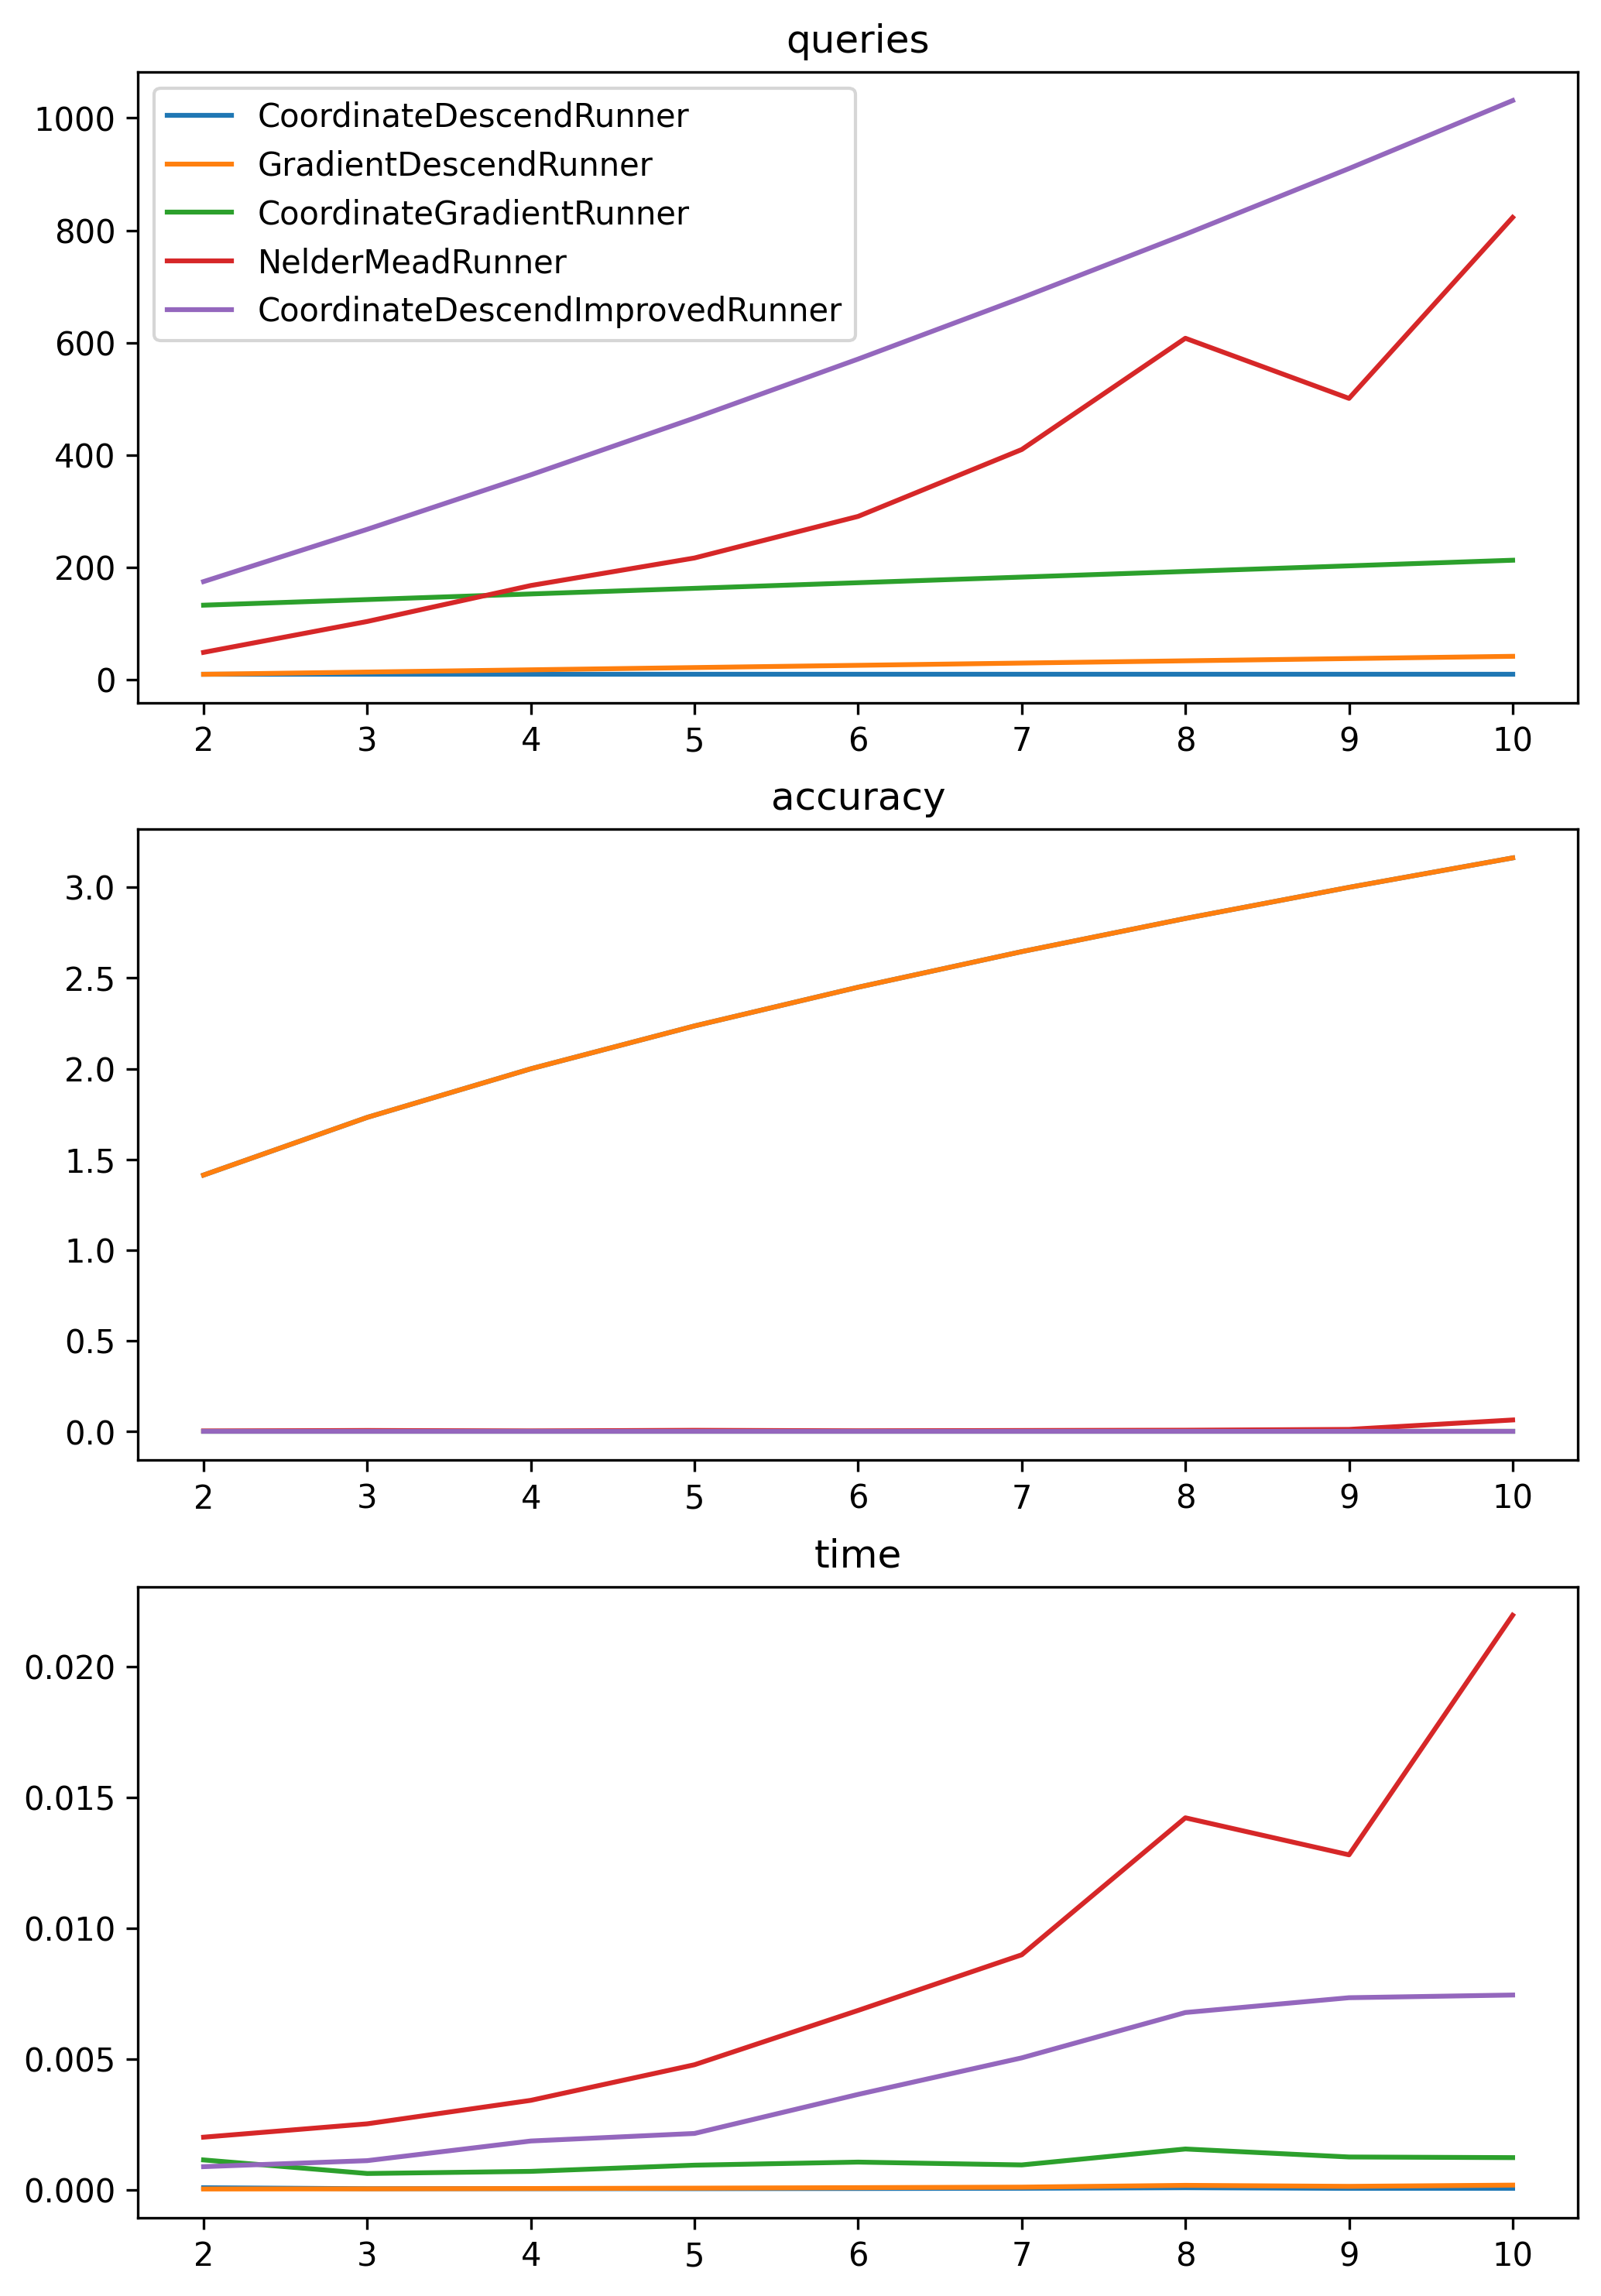

In [14]:
BenchmarkResult.plot_results(bs, ("queries", "accuracy", "time"), names=list(map(str, ns)))

`CoordinateDescendRunner` и `GradientDescendRunner` оказались не очень устойчивыми к увеличению размерности пространства (точность была потеряна на 3й размерности)
Посмотрим на оставшиеся поближе

running experiment 1
--running NelderMeadRunner
--running CoordinateDescendImprovedRunner
--running CoordinateGradientRunner
running experiment 2
--running NelderMeadRunner
--running CoordinateDescendImprovedRunner
--running CoordinateGradientRunner
running experiment 3
--running NelderMeadRunner
--running CoordinateDescendImprovedRunner
--running CoordinateGradientRunner
running experiment 4
--running NelderMeadRunner
--running CoordinateDescendImprovedRunner
--running CoordinateGradientRunner
running experiment 5
--running NelderMeadRunner
--running CoordinateDescendImprovedRunner
--running CoordinateGradientRunner
running experiment 6
--running NelderMeadRunner
--running CoordinateDescendImprovedRunner
--running CoordinateGradientRunner
running experiment 7
--running NelderMeadRunner
--running CoordinateDescendImprovedRunner
--running CoordinateGradientRunner
running experiment 8
--running NelderMeadRunner
--running CoordinateDescendImprovedRunner
--running CoordinateGradientRunner


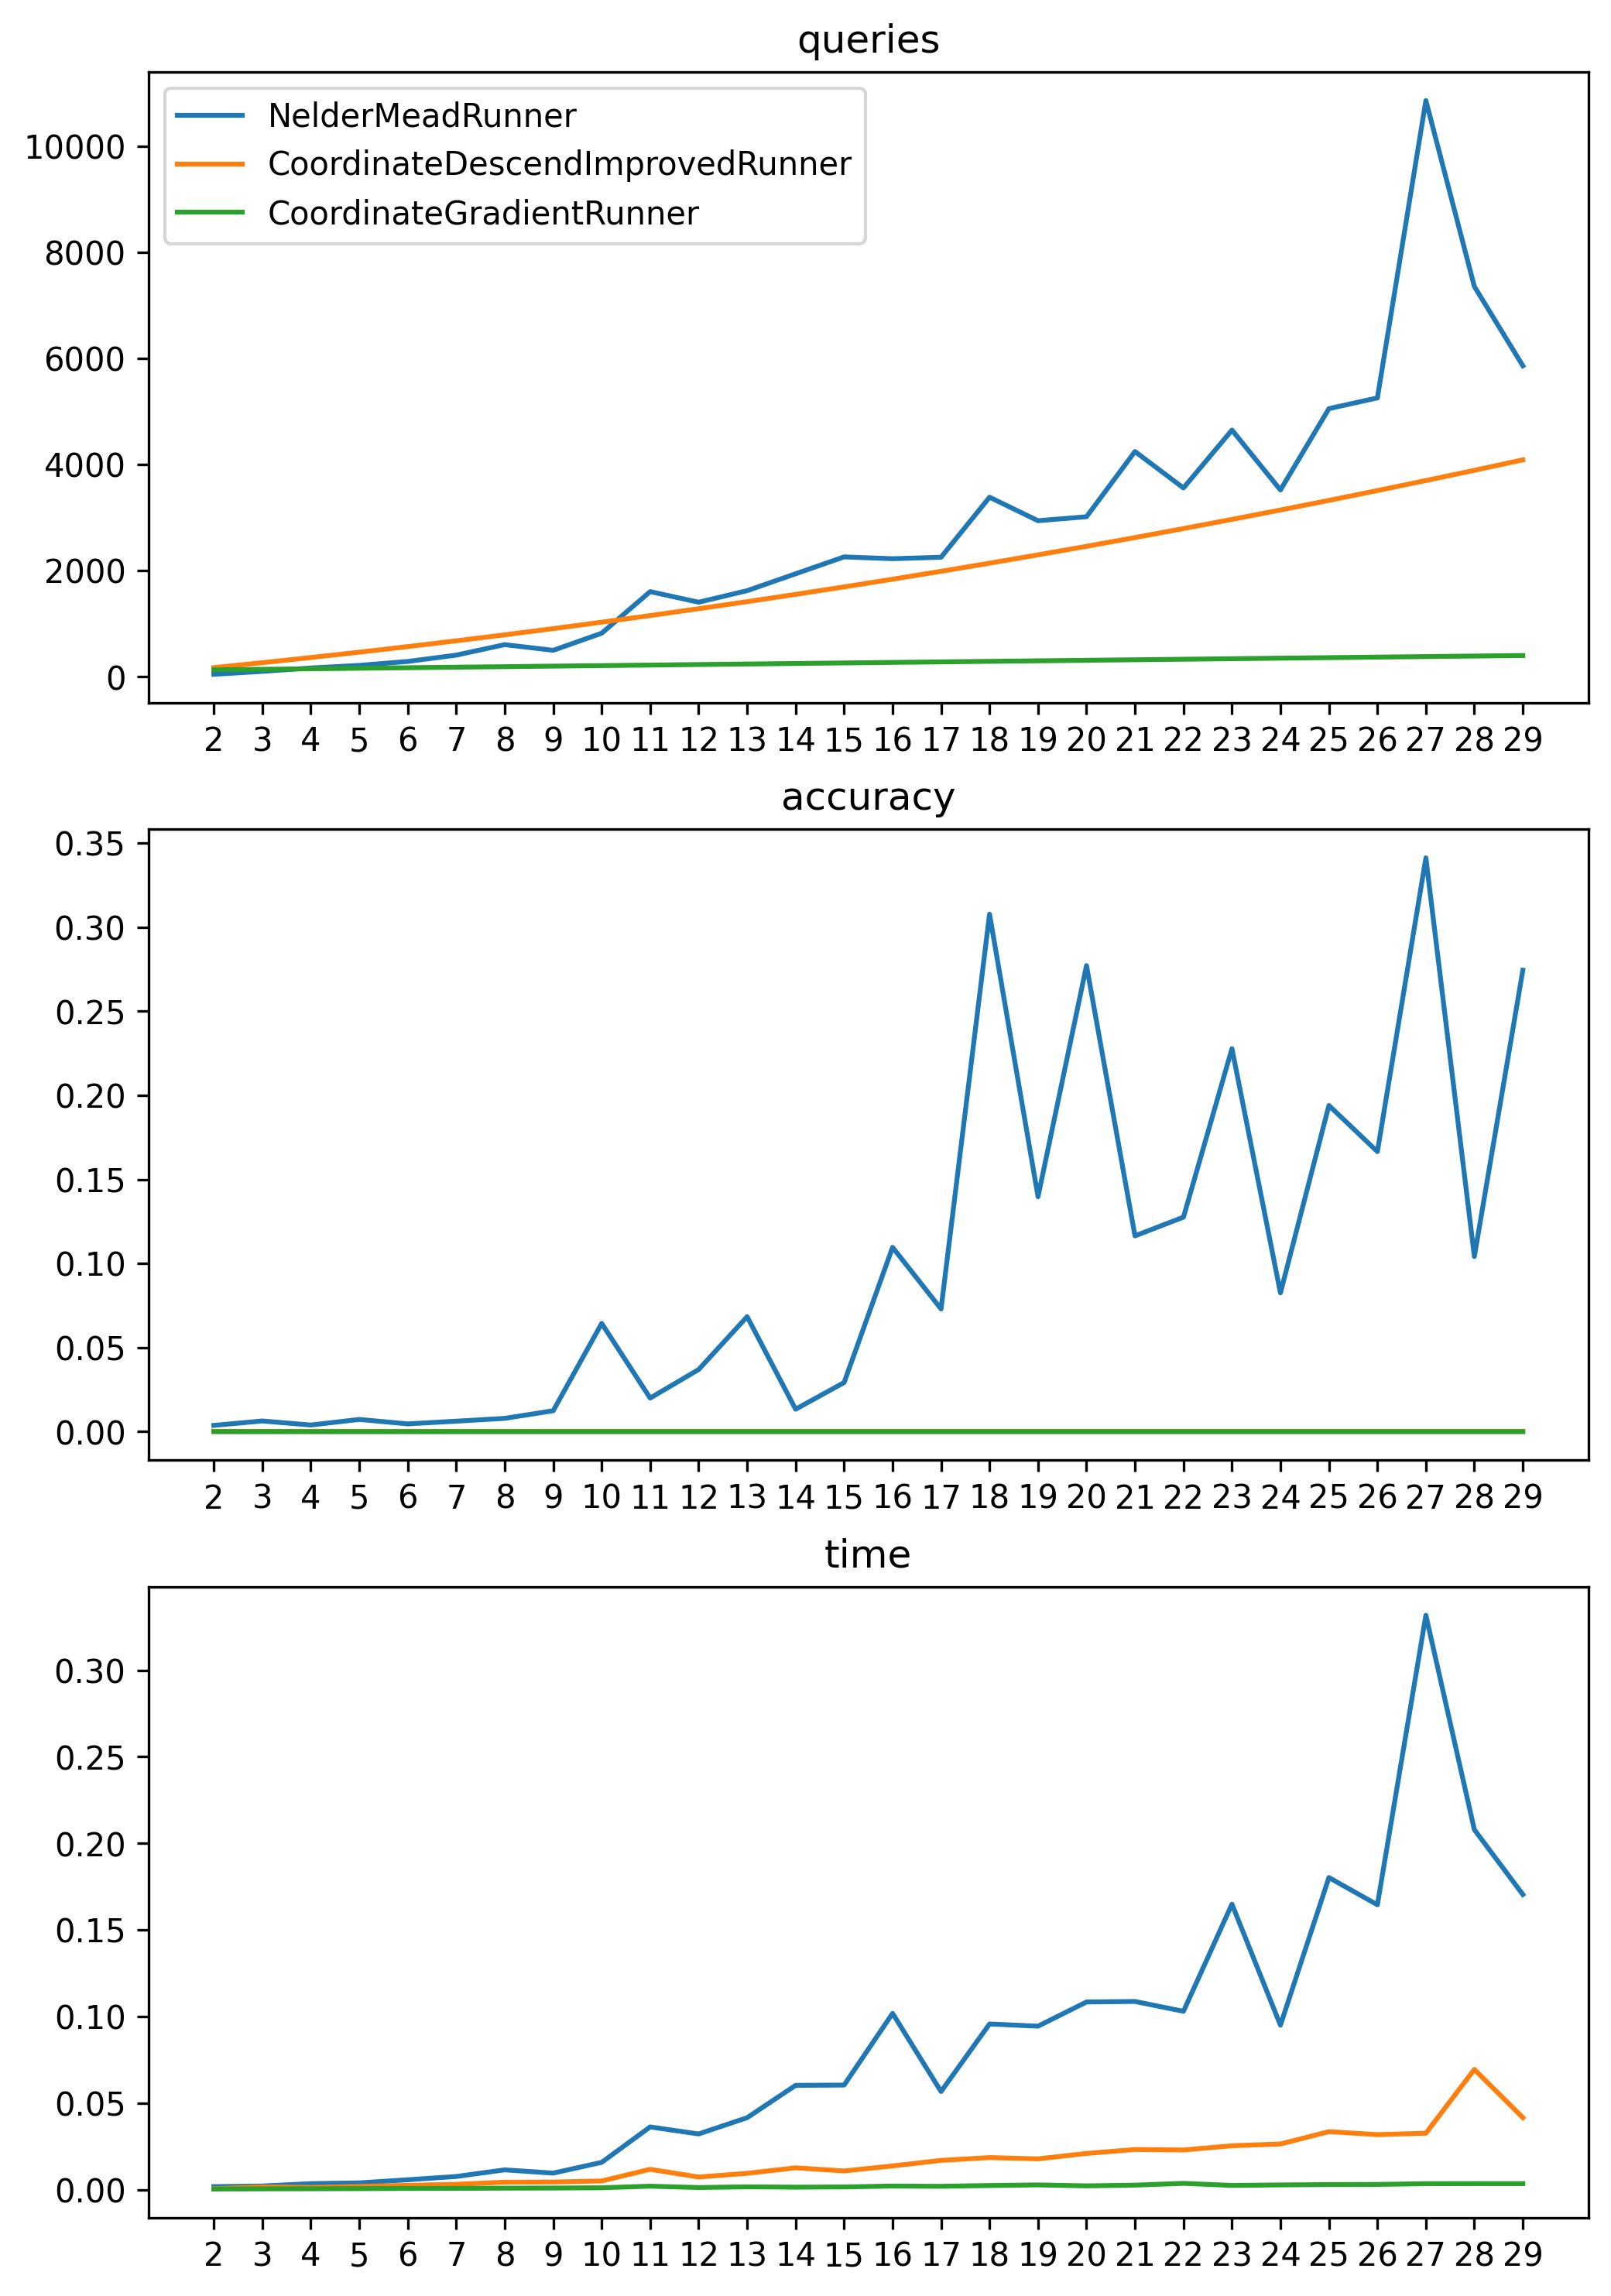

In [15]:
ns = range(2, 30)

params = []
for n in ns:
    def f(*args):
        return sum(map(lambda a: a ** 2, args))


    TARGET = Vector(*([0] * n))
    params.append(dict(
        o=Oracle(f, TARGET),
        start=Vector(*([1] * n)),
        a=GLOBAL_A,
        exit_condition=GLOBAL_EXIT_CONDITION
    ))
# (GradientDescendRunner, CoordinateGradientRunner)
bs = BenchmarkResult.series((NelderMeadRunner, CoordinateDescendImprovedRunner, CoordinateGradientRunner), params)

BenchmarkResult.plot_results(bs, ("queries", "accuracy", "time"), names=list(map(str, ns)))

`CoordinateGradientRunner` оказался самым эффективным в многомерных пространствах, `CoordinateDescendImprovedRunner` показывает себя чуть хуже

### Зашумленные значения

In [16]:
import random


def eps(mx):
    r = random.randint(0, 1000)
    return (-1 ** r) * r / 1000 * mx


mxs = list(reversed([10 ** (-i) for i in range(3, 10)]))

params = []
n = 2


def f(x, y):
    return (x - 2) ** 2 + (y + 1) ** 2 + x * y + eps(mx)


for mx in mxs:
    TARGET = Vector(10 / 3, -8 / 3)
    params.append(dict(
        o=Oracle(f, TARGET),
        start=Vector(*([1] * n)),
        a=GLOBAL_A,
        exit_condition=GLOBAL_EXIT_CONDITION
    ))
bs = BenchmarkResult.series(RunnerMeta.runners, params)

running experiment 1
--running CoordinateDescendRunner
--running GradientDescendRunner
--running CoordinateGradientRunner
--running NelderMeadRunner
--running CoordinateDescendImprovedRunner
running experiment 2
--running CoordinateDescendRunner
--running GradientDescendRunner
--running CoordinateGradientRunner
--running NelderMeadRunner
--running CoordinateDescendImprovedRunner
running experiment 3
--running CoordinateDescendRunner
--running GradientDescendRunner
--running CoordinateGradientRunner
--running NelderMeadRunner
--running CoordinateDescendImprovedRunner
running experiment 4
--running CoordinateDescendRunner
--running GradientDescendRunner
--running CoordinateGradientRunner
--running NelderMeadRunner
--running CoordinateDescendImprovedRunner
running experiment 5
--running CoordinateDescendRunner
--running GradientDescendRunner
--running CoordinateGradientRunner
--running NelderMeadRunner
--running CoordinateDescendImprovedRunner
running experiment 6
--running CoordinateDesc

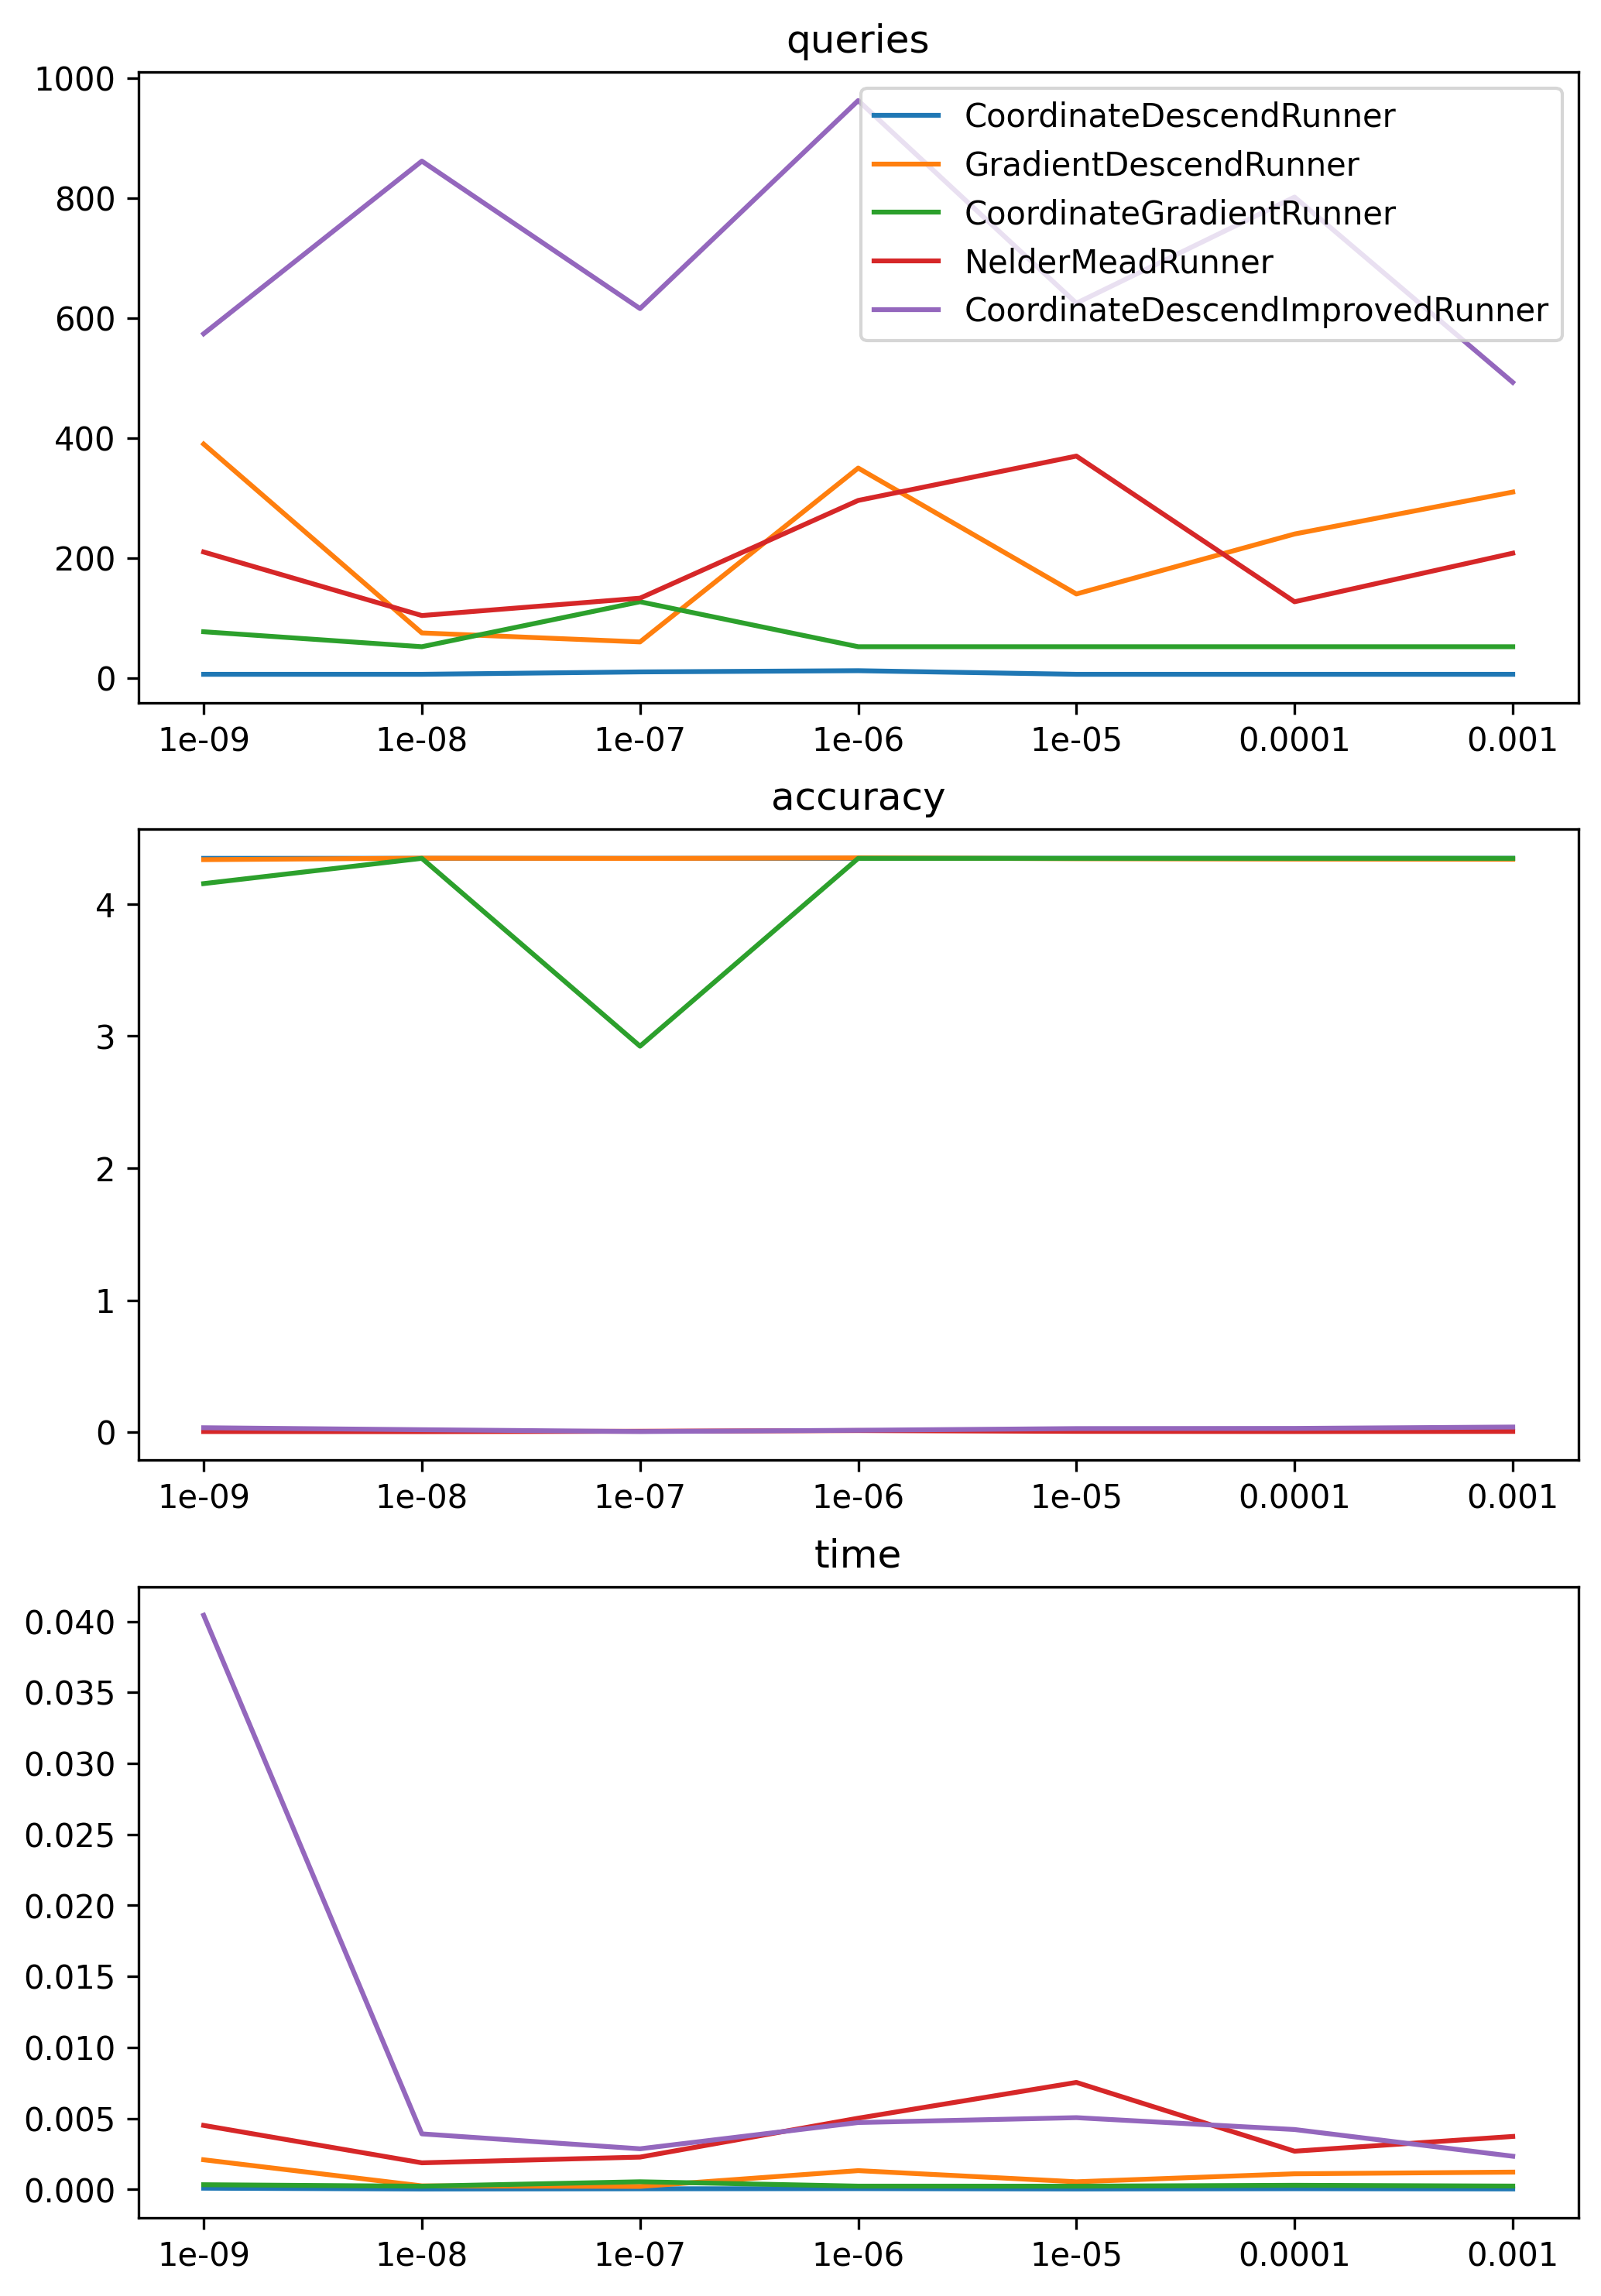

sorted by accuracy
| name                            |   accuracy |   queries |       time |
|---------------------------------+------------+-----------+------------|
| NelderMeadRunner                | 0.00591486 |       208 | 0.00373310 |
| CoordinateDescendImprovedRunner | 0.03904885 |       493 | 0.00234100 |
| GradientDescendRunner           | 4.33938222 |       310 | 0.00122140 |
| CoordinateDescendRunner         | 4.34613442 |         6 | 0.00003820 |
| CoordinateGradientRunner        | 4.34613494 |        52 | 0.00023850 |


In [17]:
BenchmarkResult.plot_results(bs, ("queries", "accuracy", "time"), names=list(map(str, mxs)))
bs[-1].top("accuracy", total=False)

Устойчивыми к шуму оказались `NelderMeadRunner` и `CoordinateDescendImprovedRunner` посмотрим на них ближе

running experiment 1
--running NelderMeadRunner
--running CoordinateDescendImprovedRunner
running experiment 2
--running NelderMeadRunner
--running CoordinateDescendImprovedRunner
running experiment 3
--running NelderMeadRunner
--running CoordinateDescendImprovedRunner
running experiment 4
--running NelderMeadRunner
--running CoordinateDescendImprovedRunner
running experiment 5
--running NelderMeadRunner
--running CoordinateDescendImprovedRunner
running experiment 6
--running NelderMeadRunner
--running CoordinateDescendImprovedRunner
running experiment 7
--running NelderMeadRunner
--running CoordinateDescendImprovedRunner


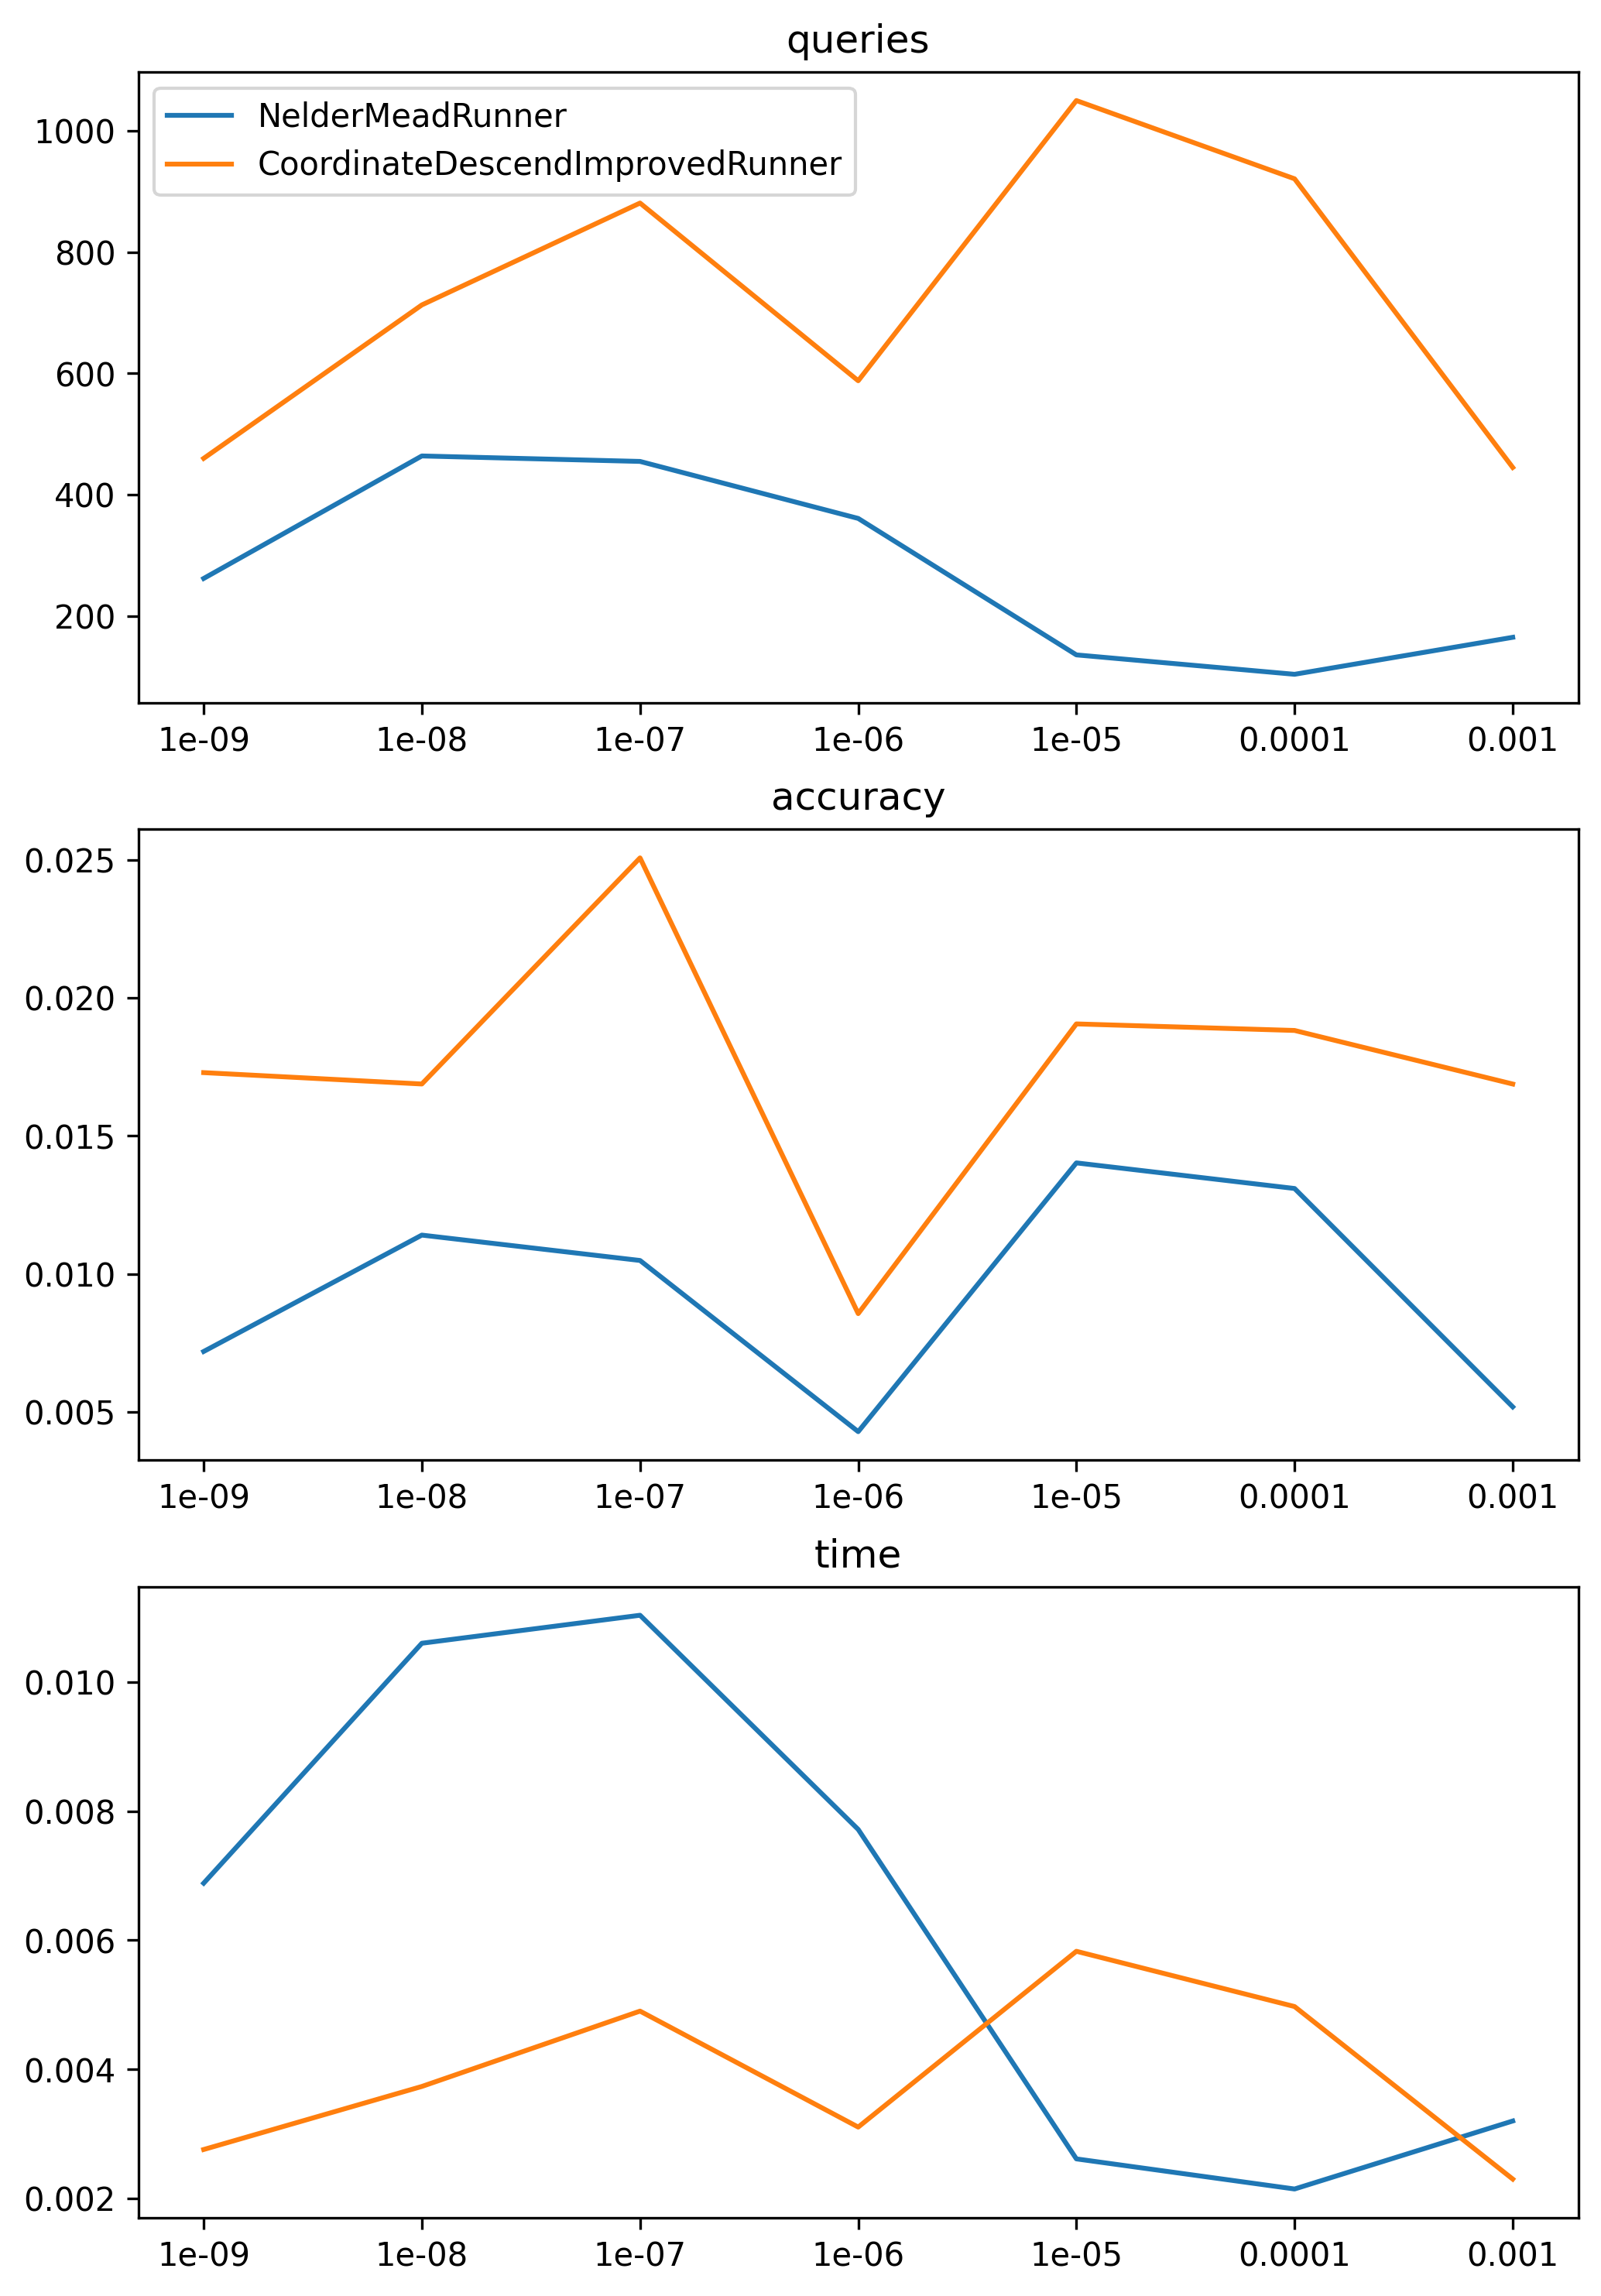

In [18]:
bs = BenchmarkResult.series((NelderMeadRunner, CoordinateDescendImprovedRunner), params)
BenchmarkResult.plot_results(bs, ("queries", "accuracy", "time"), names=list(map(str, mxs)))

Результаты разнятся от запуска к запуску, но в среднем `NelderMeadRunner` оказывается чуть лучше

### Мультимодальные функции

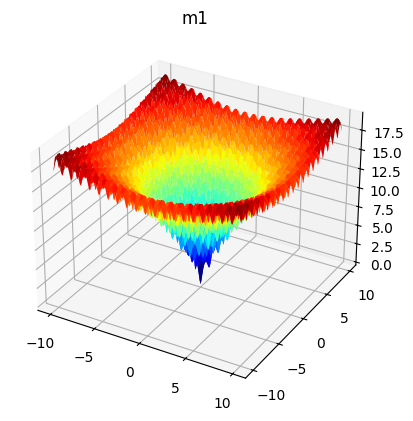

In [19]:
def m1(x, y):
    return -20.0 * exp(-0.2 * np.sqrt(0.5 * (x ** 2 + y ** 2))) - exp(
        0.5 * (cos(2 * pi * x) + cos(2 * pi * y))) + np.e + 20


plot(m1)

In [20]:
b = BenchmarkResult.compare(RunnerMeta.runners, dict(
    o=Oracle(m1, Vector(0, 0)),
    start=Vector(3, 3),
    a=GLOBAL_A,
    exit_condition=GLOBAL_EXIT_CONDITION
))

--running CoordinateDescendRunner
--running GradientDescendRunner
--running CoordinateGradientRunner
--running NelderMeadRunner
--running CoordinateDescendImprovedRunner


In [21]:
b.top("queries", "accuracy", "time")

sorted by queries
| name                            |   accuracy |   queries |       time |
|---------------------------------+------------+-----------+------------|
| CoordinateDescendRunner         | 4.24264047 |        10 | 0.00026980 |
| GradientDescendRunner           | 4.24264045 |        10 | 0.00014370 |
| NelderMeadRunner                | 4.21158218 |        74 | 0.00270720 |
| CoordinateGradientRunner        | 4.21325891 |       102 | 0.00125950 |
| CoordinateDescendImprovedRunner | 0.00000000 |       203 | 0.00184840 |

sorted by accuracy
| name                            |   accuracy |   queries |       time |
|---------------------------------+------------+-----------+------------|
| CoordinateDescendImprovedRunner | 0.00000000 |       203 | 0.00184840 |
| NelderMeadRunner                | 4.21158218 |        74 | 0.00270720 |
| CoordinateGradientRunner        | 4.21325891 |       102 | 0.00125950 |
| GradientDescendRunner           | 4.24264045 |        10 | 0.00014370 |


Справился только `CoordinateDescendImprovedRunner`
посмотрим, что будет если менять точку старта

In [22]:
points = [Vector(i, i * (-1) ** i) for i in range(1, 10)]
TARGET = Vector(0, 0)
params = []
for p in points:
    params.append(dict(
        o=Oracle(m1, TARGET),
        start=p,
        a=GLOBAL_A,
        exit_condition=GLOBAL_EXIT_CONDITION
    ))
bs = BenchmarkResult.series(RunnerMeta.runners, params)

running experiment 1
--running CoordinateDescendRunner
--running GradientDescendRunner
--running CoordinateGradientRunner
--running NelderMeadRunner
--running CoordinateDescendImprovedRunner
running experiment 2
--running CoordinateDescendRunner
--running GradientDescendRunner
--running CoordinateGradientRunner
--running NelderMeadRunner
--running CoordinateDescendImprovedRunner
running experiment 3
--running CoordinateDescendRunner
--running GradientDescendRunner
--running CoordinateGradientRunner
--running NelderMeadRunner
--running CoordinateDescendImprovedRunner
running experiment 4
--running CoordinateDescendRunner
--running GradientDescendRunner
--running CoordinateGradientRunner
--running NelderMeadRunner
--running CoordinateDescendImprovedRunner
running experiment 5
--running CoordinateDescendRunner
--running GradientDescendRunner
--running CoordinateGradientRunner
--running NelderMeadRunner
--running CoordinateDescendImprovedRunner
running experiment 6
--running CoordinateDesc

sorted by accuracy
| name                            |    accuracy |   queries |       time |
|---------------------------------+-------------+-----------+------------|
| CoordinateDescendImprovedRunner |  0.00000000 |       269 | 0.00194030 |
| CoordinateGradientRunner        | 12.71918907 |       102 | 0.00094050 |
| NelderMeadRunner                | 12.72252530 |        96 | 0.00235760 |
| CoordinateDescendRunner         | 12.72792188 |        10 | 0.00008050 |
| GradientDescendRunner           | 12.72792200 |        10 | 0.00007940 |


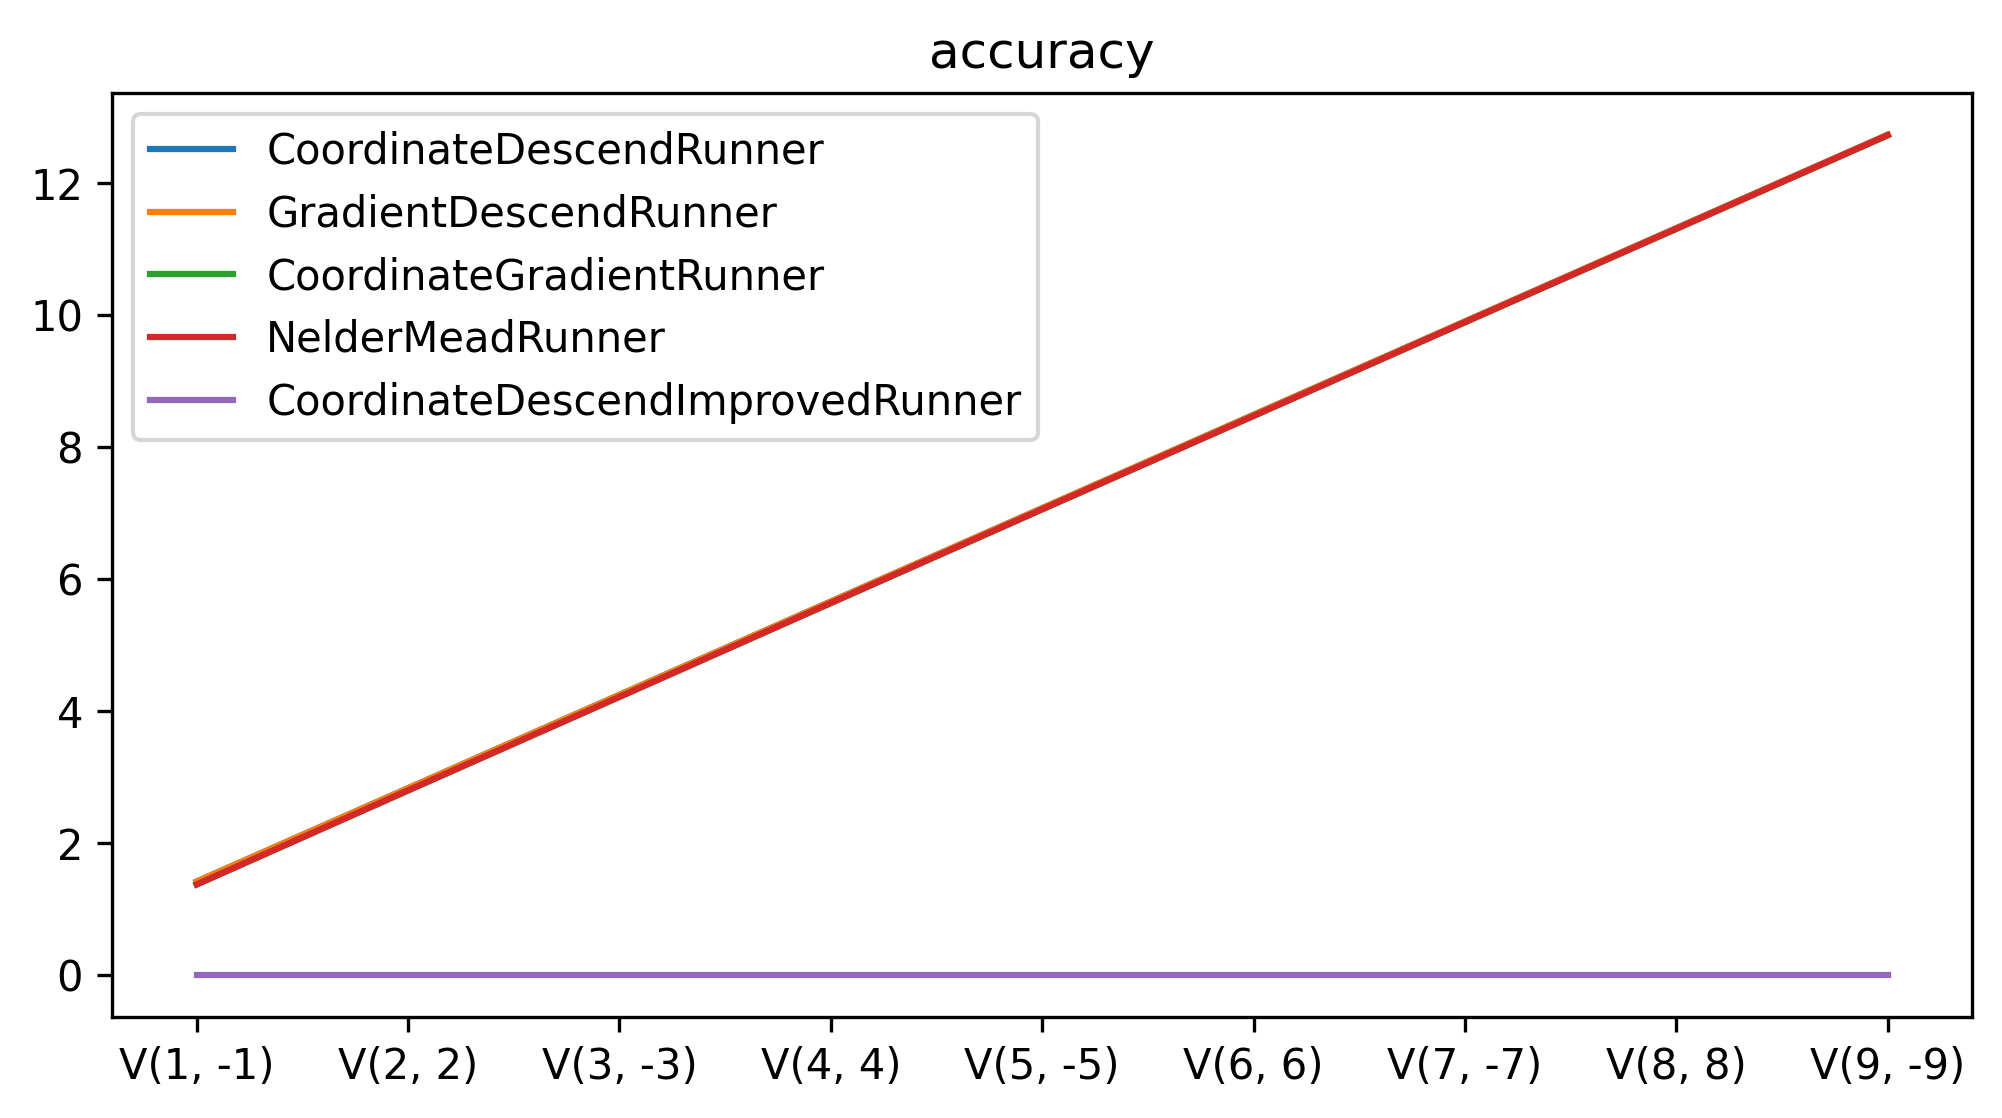

In [23]:
bs[-1].top("accuracy", total=False)
BenchmarkResult.plot_results(bs, ("accuracy",), names=list(map(str, points)))

Справляется только `CoordinateDescendImprovedRunner`

Точность (расстояние до реального минимума): 0.00000000
Кол-во запросов к оракулу: 269
Время: 0.0022 с


D:\prog\itmo_ct\4-sem\metopt\common\utils.py:322: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
D:\prog\itmo_ct\4-sem\metopt\common\utils.py:342: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


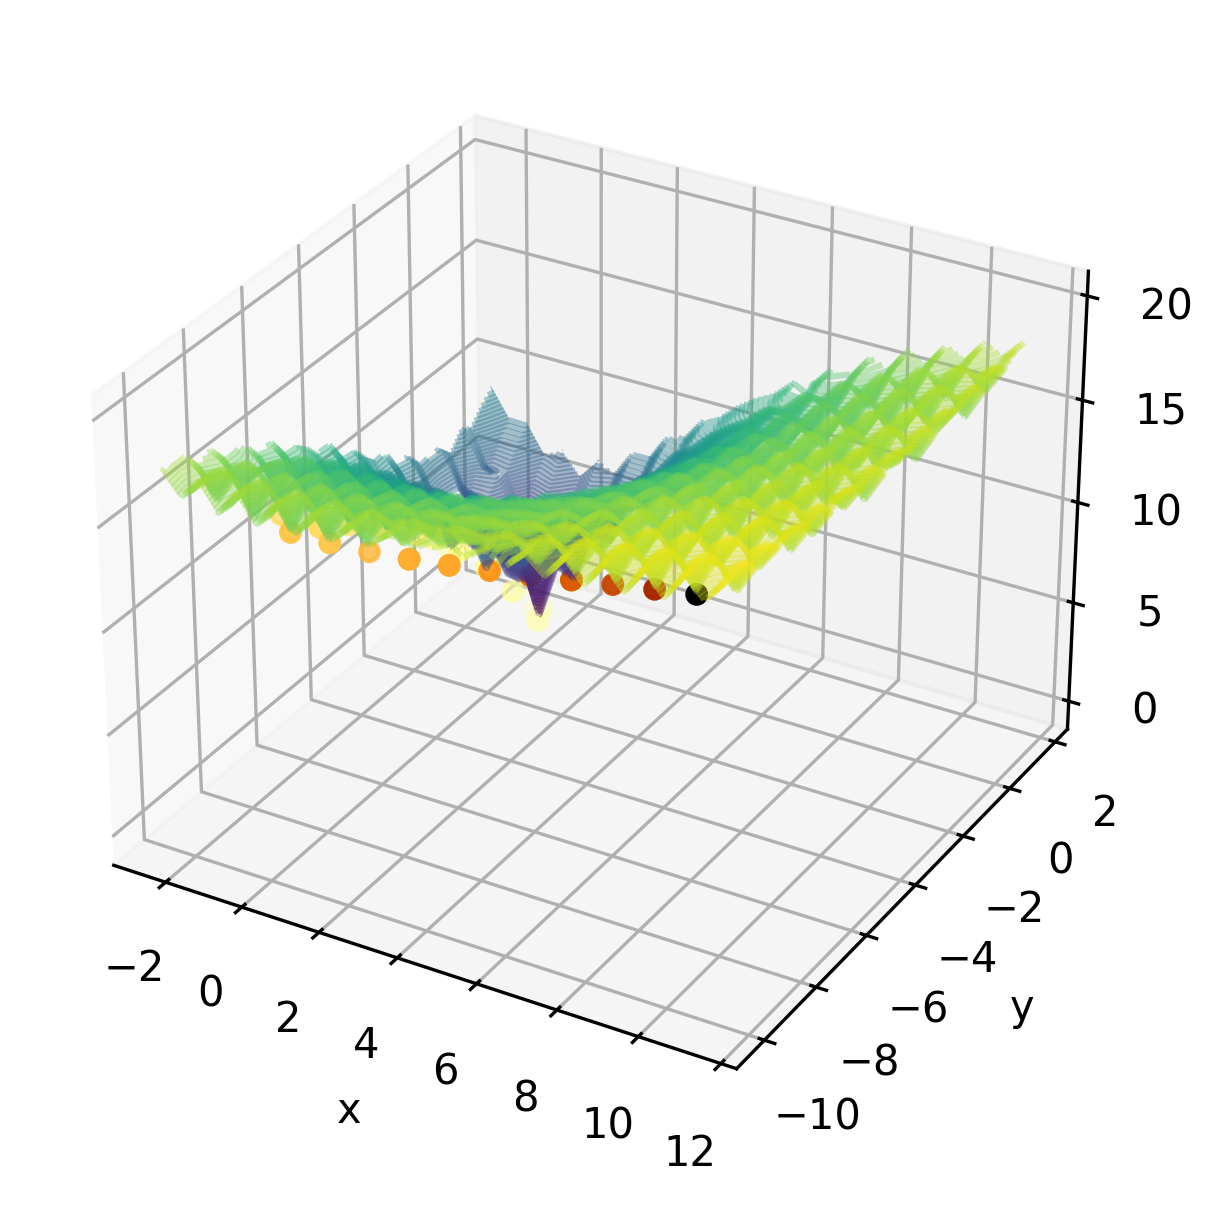

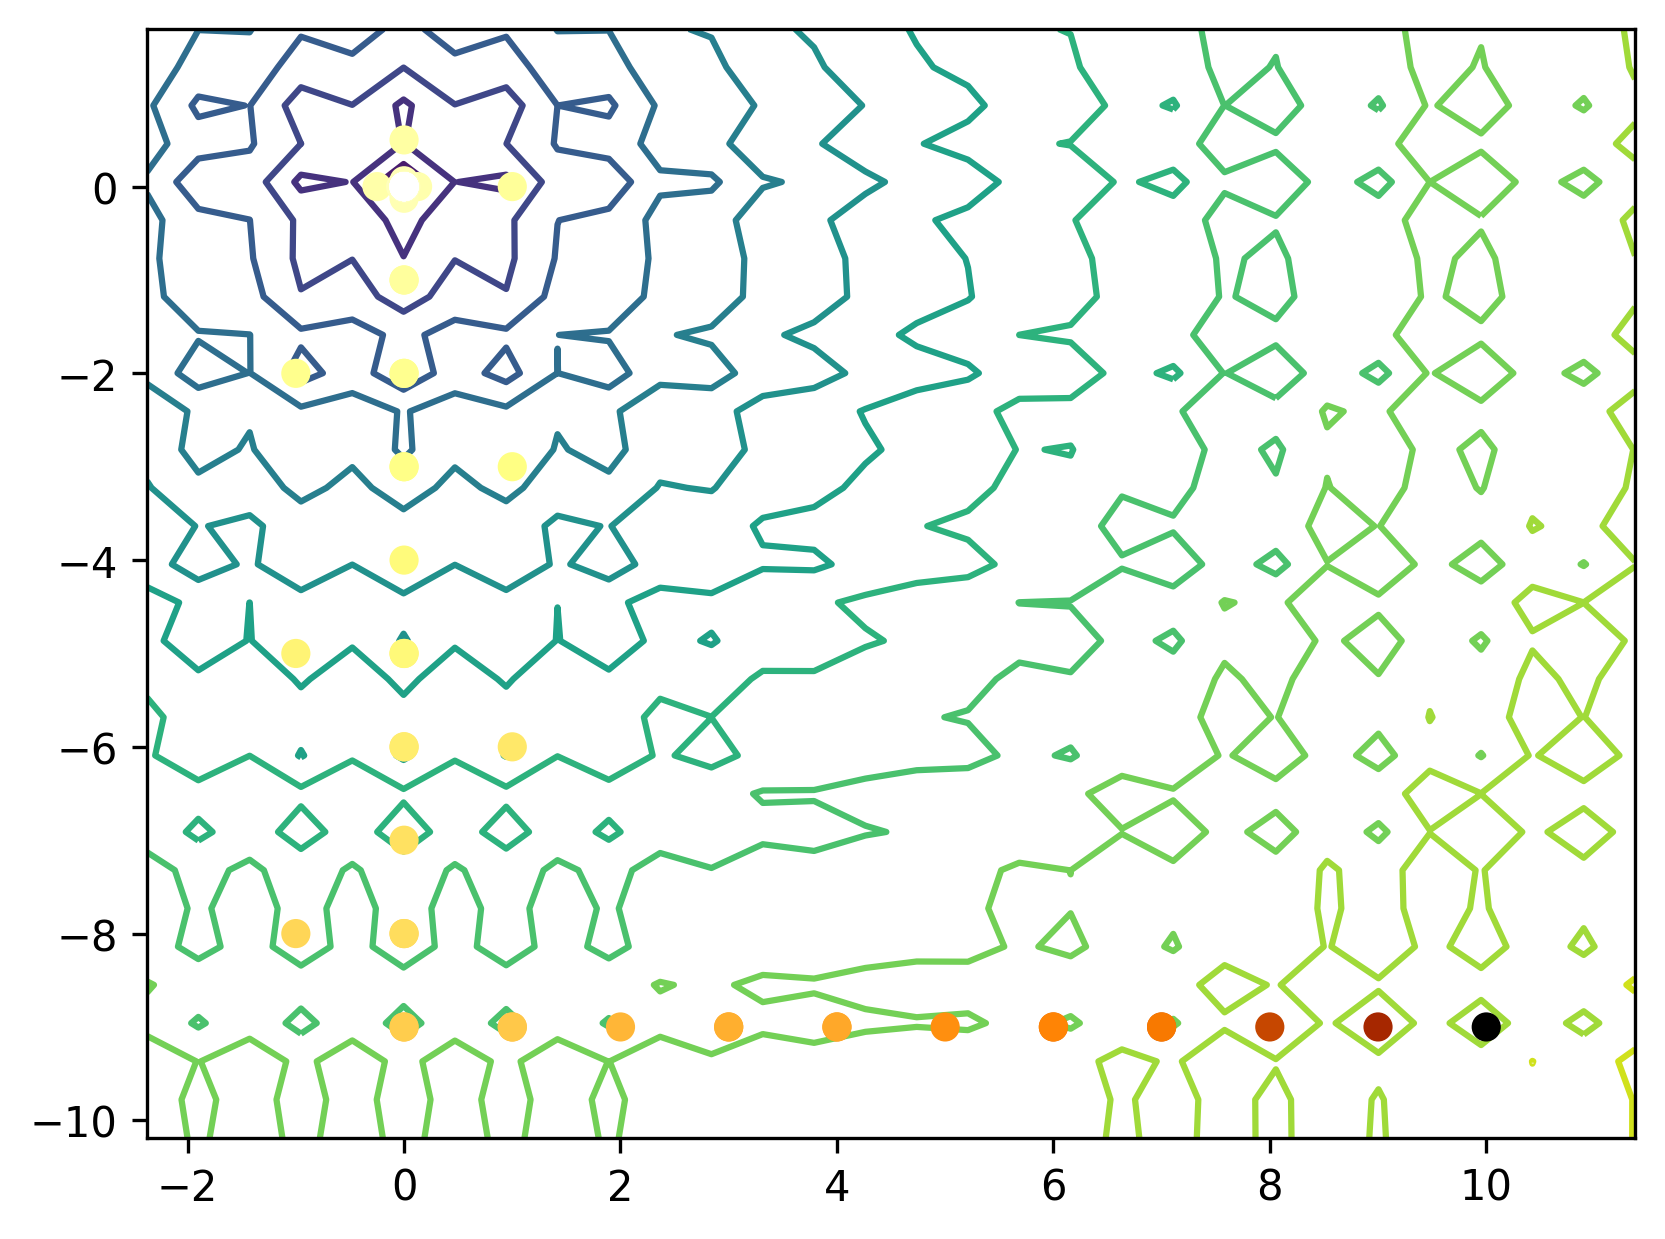

In [24]:
runner = CoordinateDescendImprovedRunner(
    o=Oracle(m1, TARGET),
    start=Vector(9, -9),
    a=GLOBAL_A,
    exit_condition=GLOBAL_EXIT_CONDITION
)
runner.experiment(False, points=100, plt_cfg=PlotConfig(3, -3, dpi=300))

### Эффективность методов в зависимости от шага и условия выхода

In [25]:
as_ = (
        [(Coef.CONST(10 ** (-i)), f"C({i})") for i in range(1, 5)] +
        [(Coef.GEOMETRIC_PROGRESSION(0.1, 1 - 10 ** (-i)), f"G({i})") for i in range(3, 8)]
)
TARGET = Vector(0, 0)
params = []
names = []
for a, name in as_:
    names.append(name)
    params.append(dict(
        o=Oracle(f1, TARGET),
        start=Vector(3, 3),
        a=a,
        exit_condition=GLOBAL_EXIT_CONDITION
    ))
bs = BenchmarkResult.series(RunnerMeta.runners, params)

running experiment 1
--running CoordinateDescendRunner
--running GradientDescendRunner
--running CoordinateGradientRunner
--running NelderMeadRunner
--running CoordinateDescendImprovedRunner
running experiment 2
--running CoordinateDescendRunner
--running GradientDescendRunner
--running CoordinateGradientRunner
--running NelderMeadRunner
--running CoordinateDescendImprovedRunner
running experiment 3
--running CoordinateDescendRunner
--running GradientDescendRunner
--running CoordinateGradientRunner
--running NelderMeadRunner
--running CoordinateDescendImprovedRunner
running experiment 4
--running CoordinateDescendRunner
--running GradientDescendRunner
--running CoordinateGradientRunner
--running NelderMeadRunner
--running CoordinateDescendImprovedRunner
running experiment 5
--running CoordinateDescendRunner
--running GradientDescendRunner
--running CoordinateGradientRunner
--running NelderMeadRunner
--running CoordinateDescendImprovedRunner
running experiment 6
--running CoordinateDesc

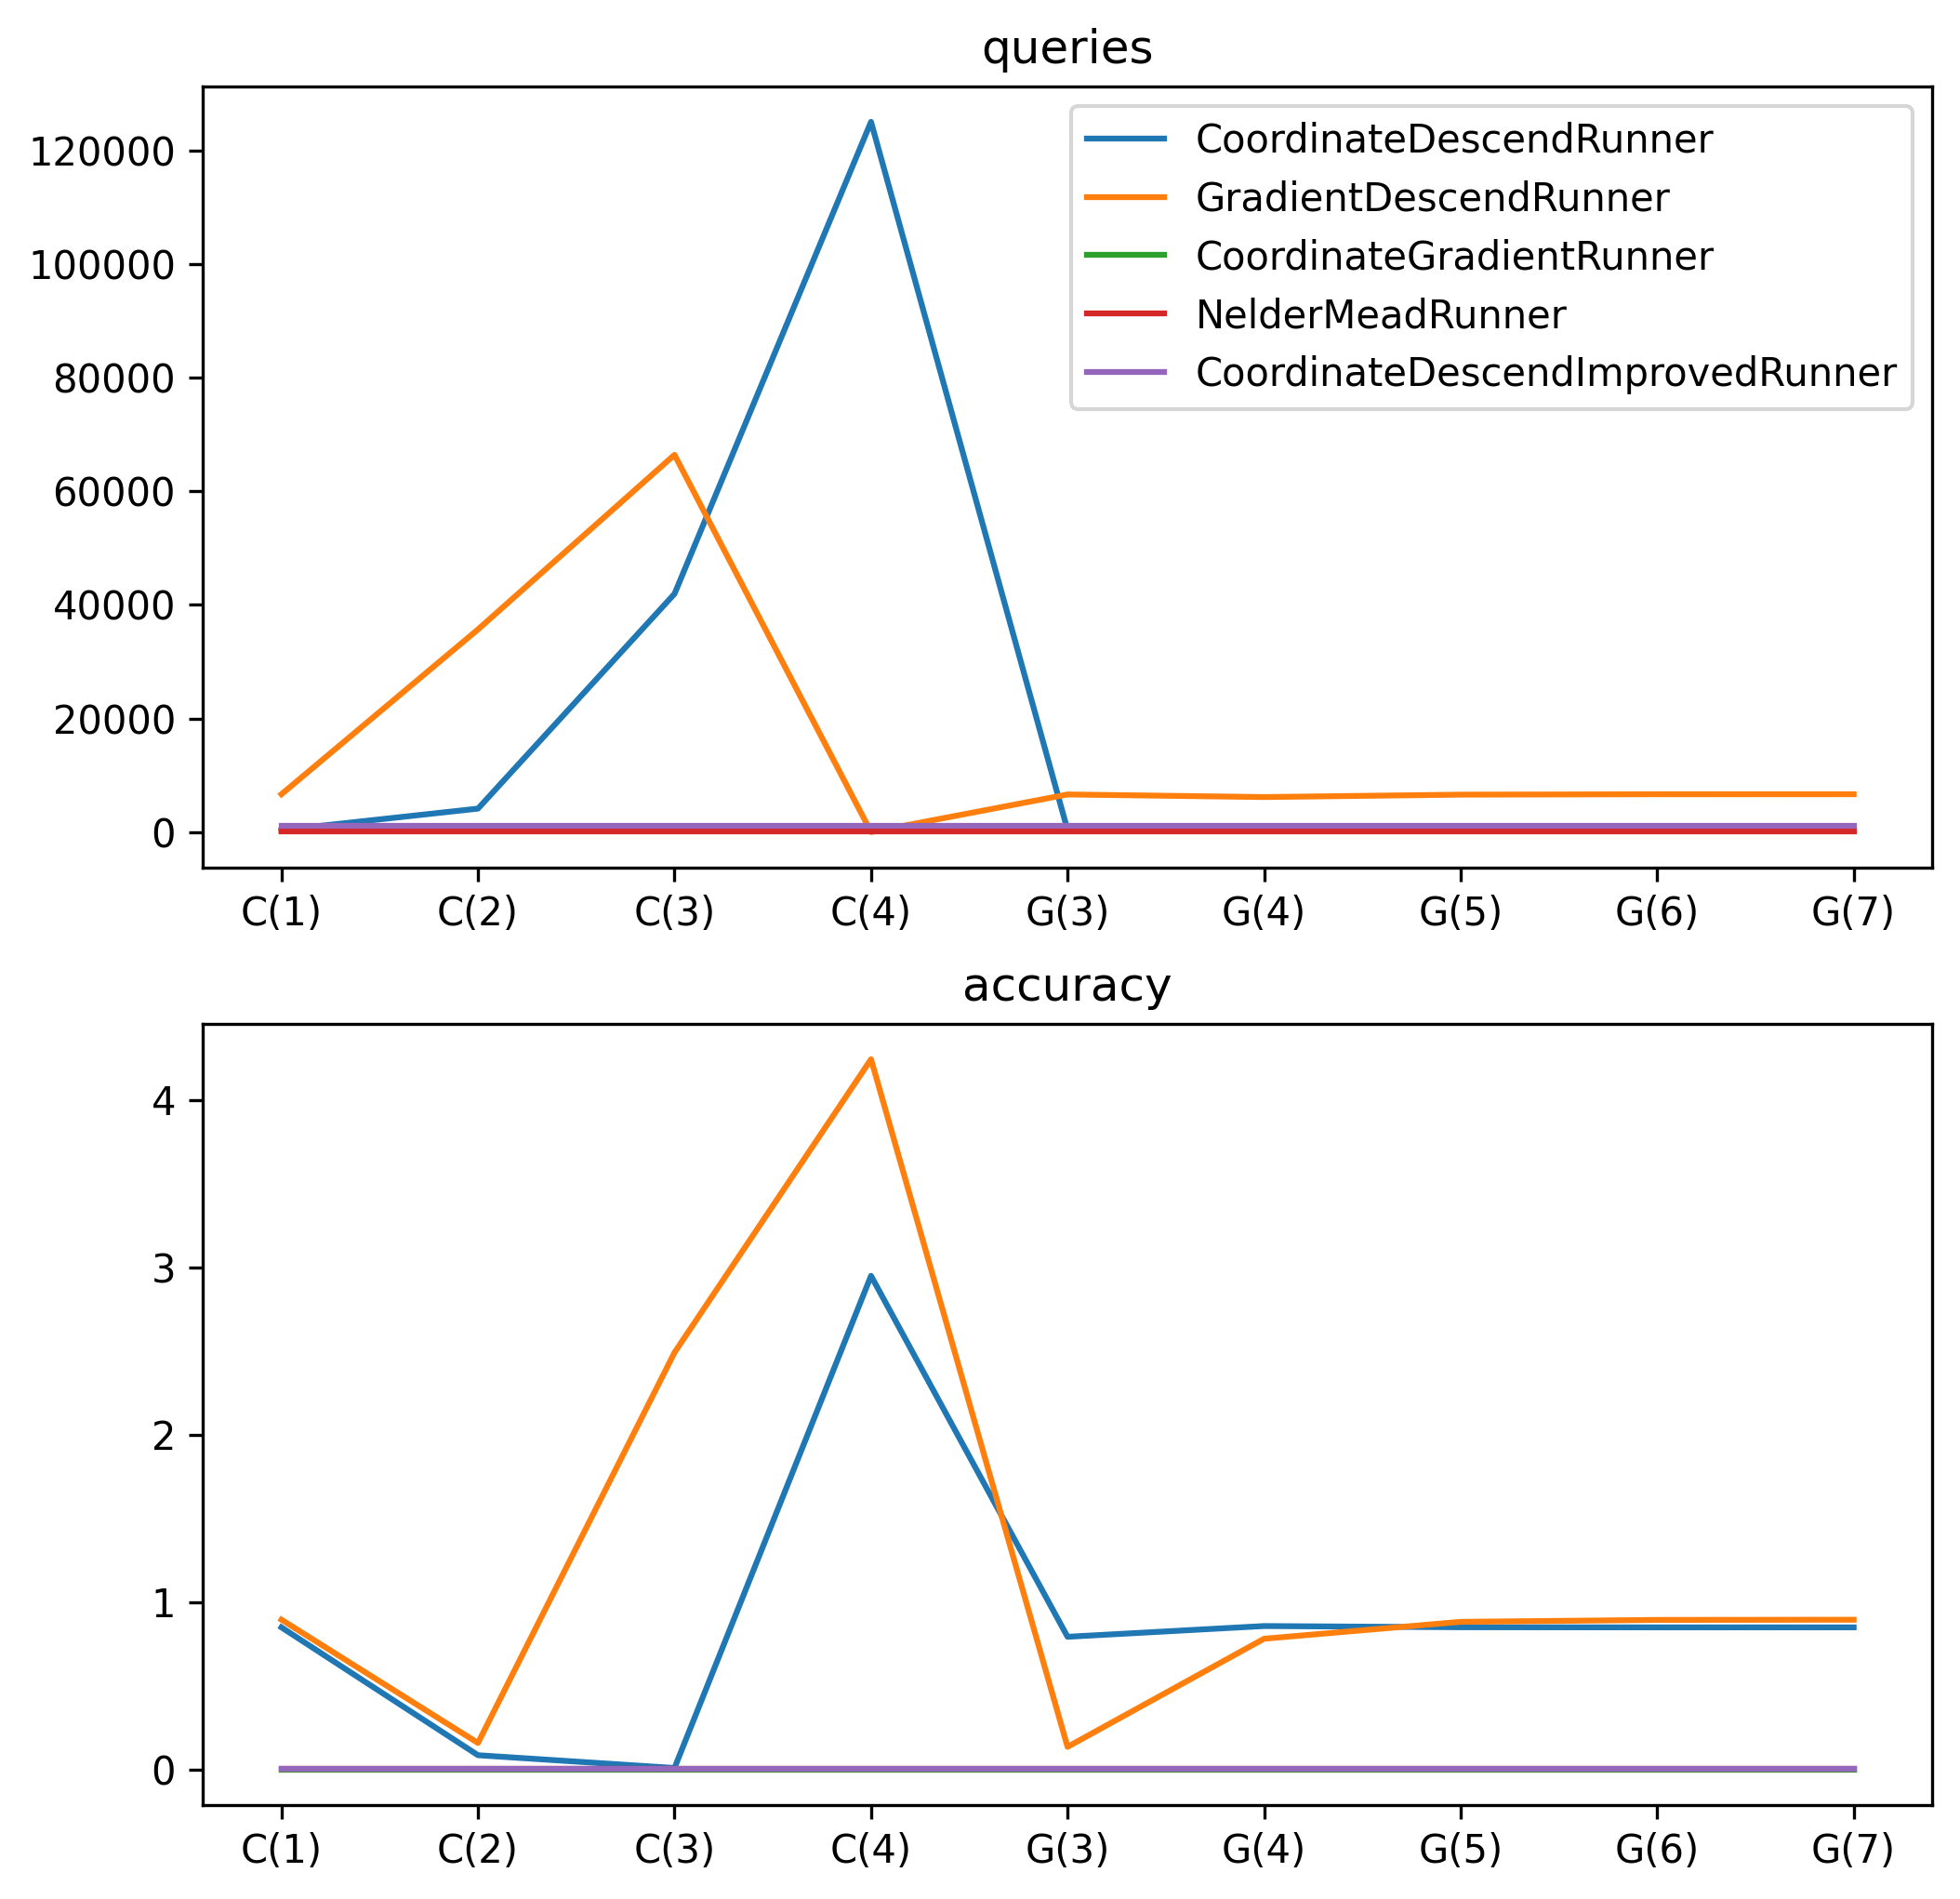

In [26]:
BenchmarkResult.plot_results(bs, ("queries", "accuracy"), names)

Константный генератор показывает себя хуже, чем геометрическая прогрессия
Градиентный и координатный спуск очень чувствительны к изменению генератора

In [27]:
es_ = (
        [(ExitCondition.NORM(Metric.EUCLID, 10 ** (-i)), f"N({i})") for i in range(3, 8)] +
        [(ExitCondition.DELTA(10 ** (-i)), f"D({i})") for i in range(3, 8)]
)
    
TARGET = Vector(0, 0)
params = []
names = []
for e, name in es_:
    names.append(name)
    params.append(dict(
        o=Oracle(f1, TARGET),
        start=Vector(3, 3),
        a=GLOBAL_A,
        exit_condition=e
    ))
bs = BenchmarkResult.series(RunnerMeta.runners, params)

running experiment 1
--running CoordinateDescendRunner
--running GradientDescendRunner
--running CoordinateGradientRunner
--running NelderMeadRunner
--running CoordinateDescendImprovedRunner
running experiment 2
--running CoordinateDescendRunner
--running GradientDescendRunner
--running CoordinateGradientRunner
--running NelderMeadRunner
--running CoordinateDescendImprovedRunner
running experiment 3
--running CoordinateDescendRunner
--running GradientDescendRunner
--running CoordinateGradientRunner
--running NelderMeadRunner
--running CoordinateDescendImprovedRunner
running experiment 4
--running CoordinateDescendRunner
--running GradientDescendRunner
--running CoordinateGradientRunner
--running NelderMeadRunner
--running CoordinateDescendImprovedRunner
running experiment 5
--running CoordinateDescendRunner
--running GradientDescendRunner
--running CoordinateGradientRunner
--running NelderMeadRunner
--running CoordinateDescendImprovedRunner
running experiment 6
--running CoordinateDesc

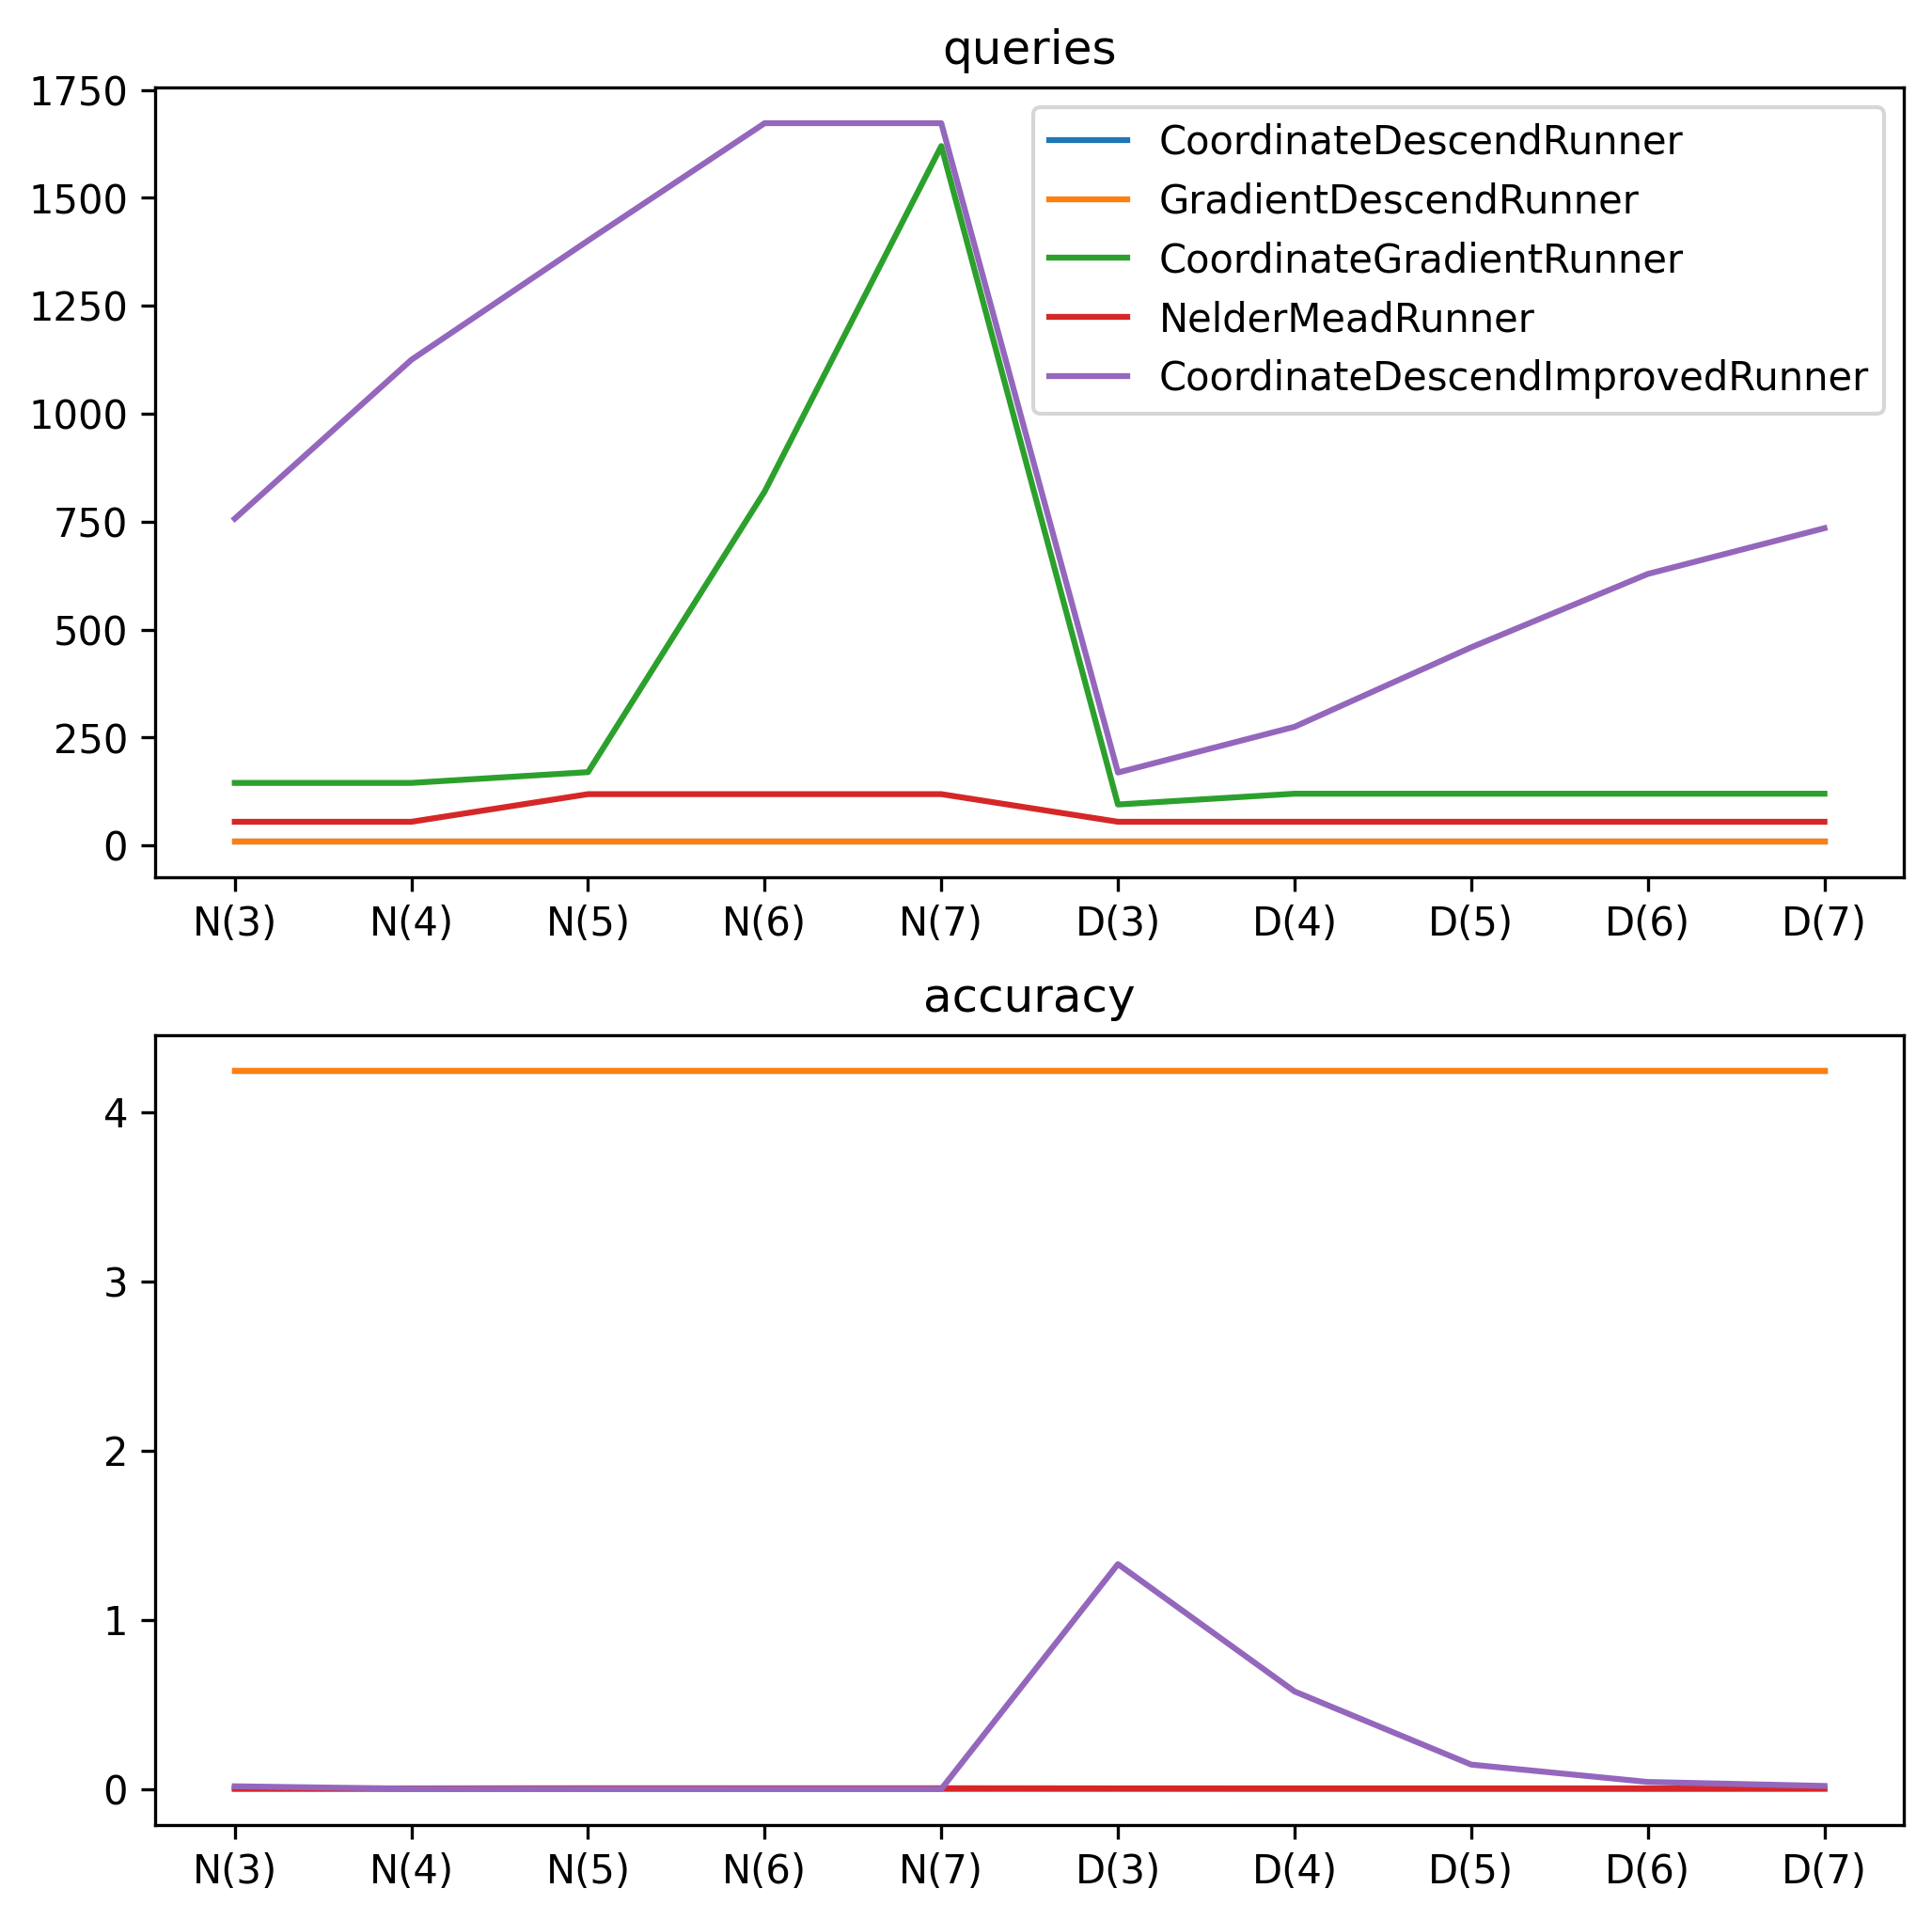

In [28]:
BenchmarkResult.plot_results(bs, ("queries", "accuracy"), names)